
**Attributes**

**People**

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

**Target**

Need to perform clustering to summarize customer segments.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids


import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("marketing_campaign.xlsx")

In [3]:
df = data.copy()

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Ön Bakış

In [5]:
# bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
# eşsiz değerler
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [7]:
# istatistiksel değerler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [8]:
# eksik verilerin gözlemi
df.isnull().sum() 

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Veri Setinin Düzenlenmesi

In [9]:
# eksik vrilerin silinmesi
df.dropna(inplace=True) 

In [10]:
# müşterilerin kayıt yılı zaman tipine çevrilmesi
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)

In [11]:
# kayıt olurkenki yaşını bulmak için
df["Dt_Customer"].max()

Timestamp('2014-06-29 00:00:00')

In [12]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
# burada collected verilerin toplandığı tarih olarak alındı, days ise üye olduğu toplam gün sayısı
df["Collected"] = "2014-12-07"
df["Collected"] = pd.to_datetime(df["Collected"])
df["Days"] = (df["Collected"] - df["Dt_Customer"]).dt.days

# toplam çocuk sayısı
df["Childeren"] = df["Kidhome"] + df["Teenhome"]

# müşterlerin yaşı
df["Age"] = 2014 - df["Year_Birth"]

# toplam satın alım
df["NumTotalPurchases"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

# toplam gider
df["Expenses"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"] 

# karmaşıklığı azaltıyoruz aynı anlama gelen değerler var
df["Marital_Status"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

# eğitim durumu sınıflandırması
df["Education"] = df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Postgraduate", "Graduation":"Postgraduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

# toplam teklif kabulü
df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']


In [14]:
# model karmaşıklığını azaltmak için silinecek sütunlar
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response",
           "NumWebVisitsMonth", "Kidhome", "Teenhome"]
df.drop(col_del, axis=1, inplace=True)

In [15]:
# işe yaramayan sütunlar 
df.drop(["ID","Z_CostContact", "Z_Revenue", "Year_Birth", "Dt_Customer" , "Complain", "Collected"], axis=1, inplace=True)

## Değişkenlerin İncelenmesi

In [16]:
# nümerik ve kategorik değerleri ayırmak için 
def grab_col_names(df):
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    print(f"Gozlem: {df.shape[0]}")
    print(f"Toplam Degisken: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    
    return cat_cols, num_cols

In [17]:
cat_cols, num_cols = grab_col_names(df)

Gozlem: 2216
Toplam Degisken: 20
cat_cols: 2
num_cols: 18


In [18]:
# kategorik değerlerin dağılımı
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        sns.countplot(x=col_name, data=dataframe)
        plt.show(block=True)
        
    print("****************************************************")

               Education      Ratio
Education                          
Postgraduate        2162  97.563177
Undergraduate         54   2.436823


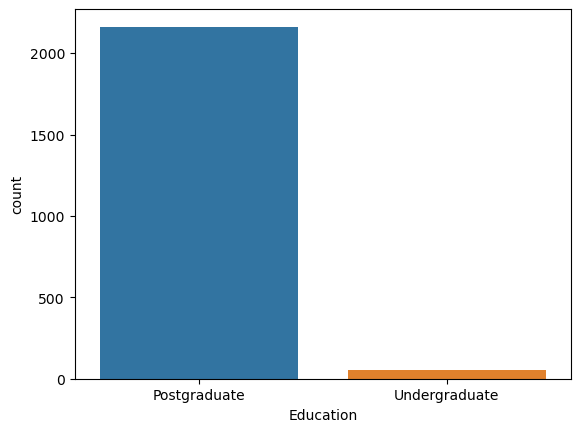

****************************************************
                Marital_Status      Ratio
Marital_Status                           
Partner                   1430  64.530686
Alone                      786  35.469314


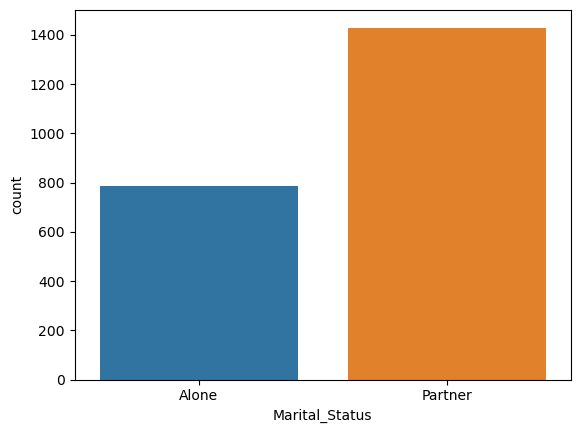

****************************************************


In [19]:
for col in cat_cols:
    cat_summary(df, col, plot = True)

In [20]:
# nümerik değerlerin dağılımı
def num_summary(dataframe, numerical_col, plot=False):
    print(dataframe[numerical_col].describe().T)
    
    if plot:
        sns.histplot(dataframe[numerical_col], kde = False);
        plt.show(block=True)
        
    print("****************************************************")

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64


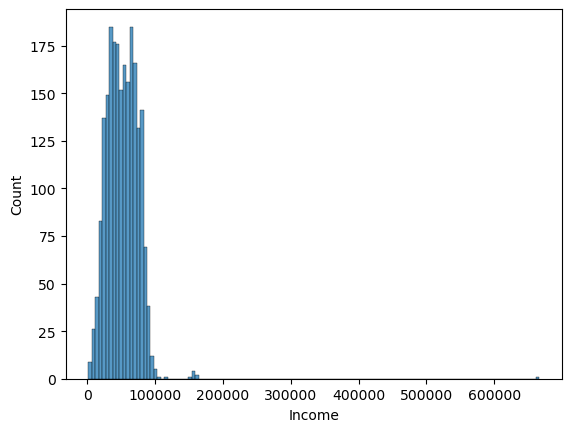

****************************************************
count    2216.000000
mean       49.012635
std        28.948352
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


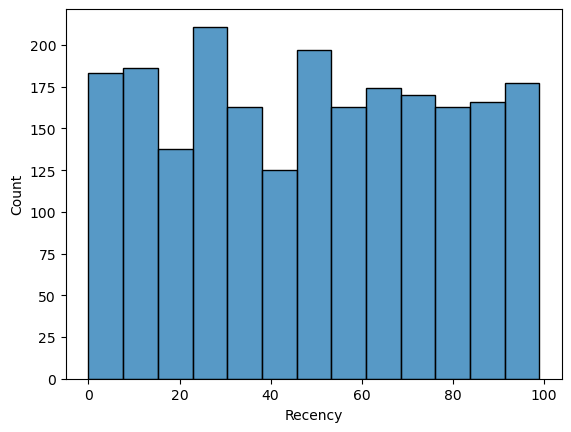

****************************************************
count    2216.000000
mean      305.091606
std       337.327920
min         0.000000
25%        24.000000
50%       174.500000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64


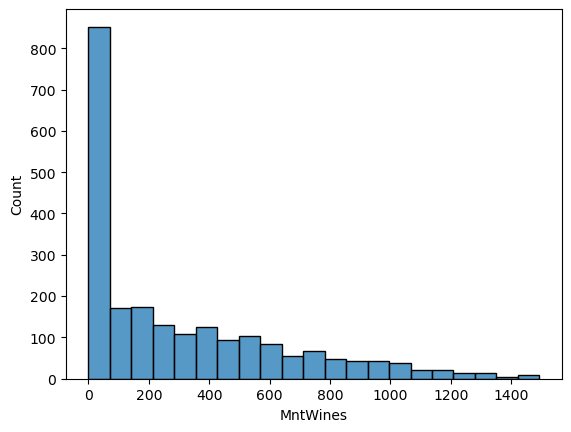

****************************************************
count    2216.000000
mean       26.356047
std        39.793917
min         0.000000
25%         2.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64


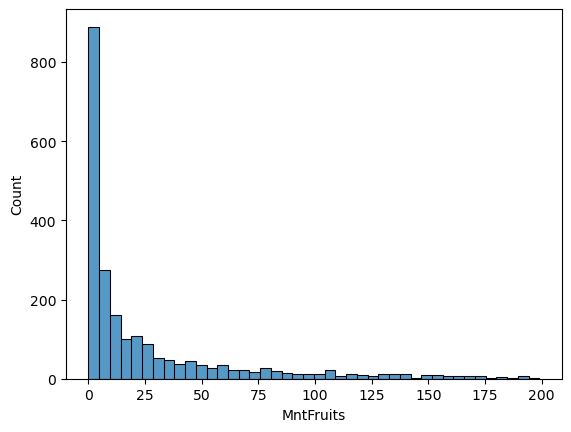

****************************************************
count    2216.000000
mean      166.995939
std       224.283273
min         0.000000
25%        16.000000
50%        68.000000
75%       232.250000
max      1725.000000
Name: MntMeatProducts, dtype: float64


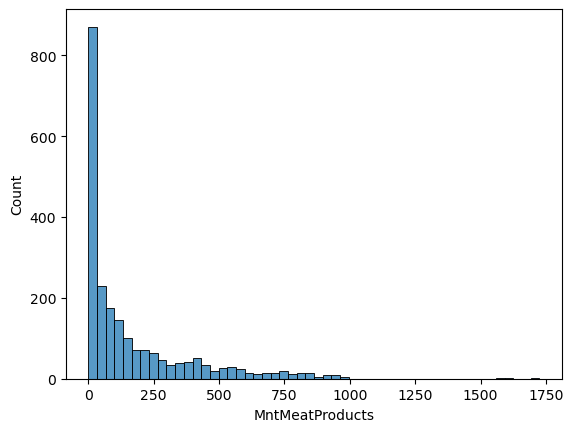

****************************************************
count    2216.000000
mean       37.637635
std        54.752082
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64


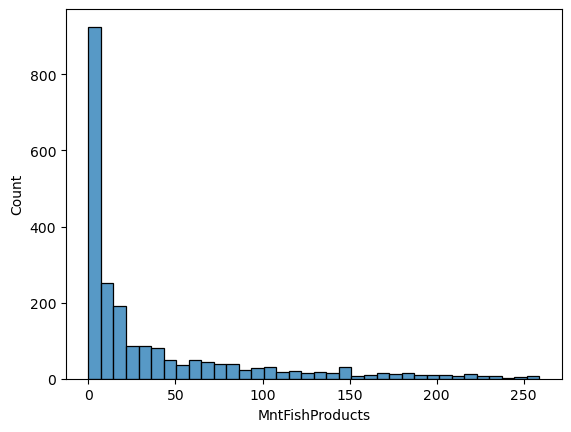

****************************************************
count    2216.000000
mean       27.028881
std        41.072046
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       262.000000
Name: MntSweetProducts, dtype: float64


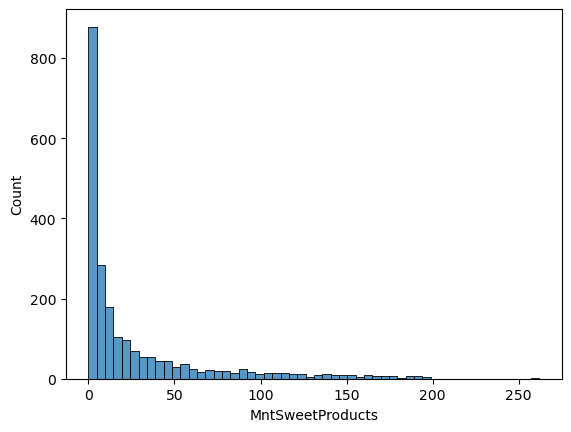

****************************************************
count    2216.000000
mean       43.965253
std        51.815414
min         0.000000
25%         9.000000
50%        24.500000
75%        56.000000
max       321.000000
Name: MntGoldProds, dtype: float64


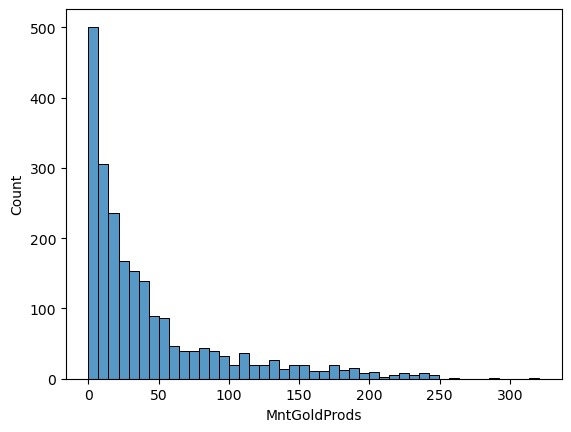

****************************************************
count    2216.000000
mean        2.323556
std         1.923716
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64


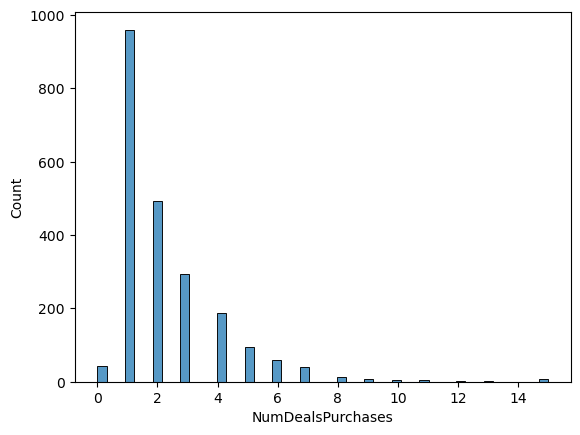

****************************************************
count    2216.000000
mean        4.085289
std         2.740951
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64


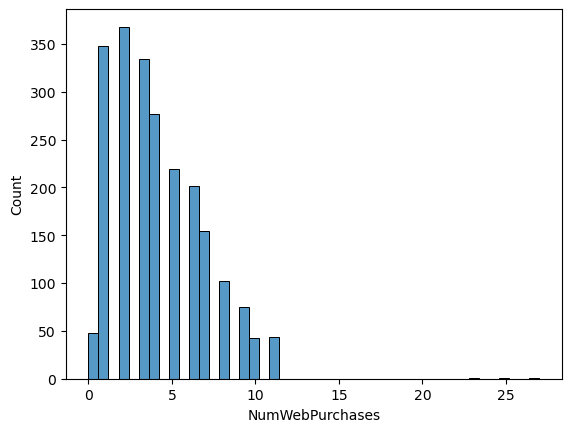

****************************************************
count    2216.000000
mean        2.671029
std         2.926734
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64


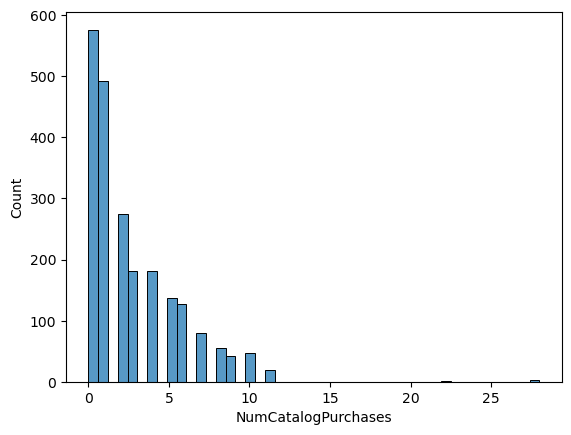

****************************************************
count    2216.000000
mean        5.800993
std         3.250785
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64


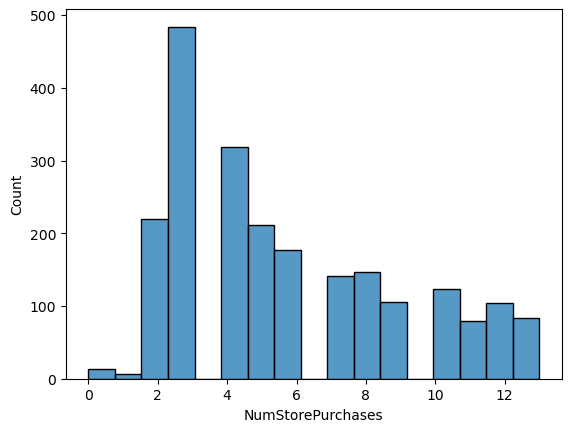

****************************************************
count    2216.000000
mean      514.521209
std       202.434667
min       161.000000
25%       341.000000
50%       516.500000
75%       690.000000
max       860.000000
Name: Days, dtype: float64


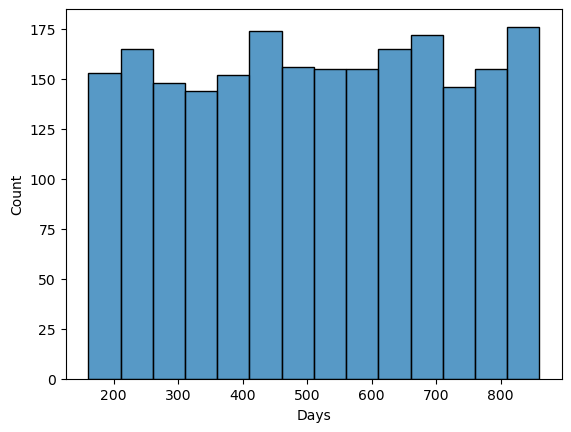

****************************************************
count    2216.000000
mean        0.947202
std         0.749062
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Childeren, dtype: float64


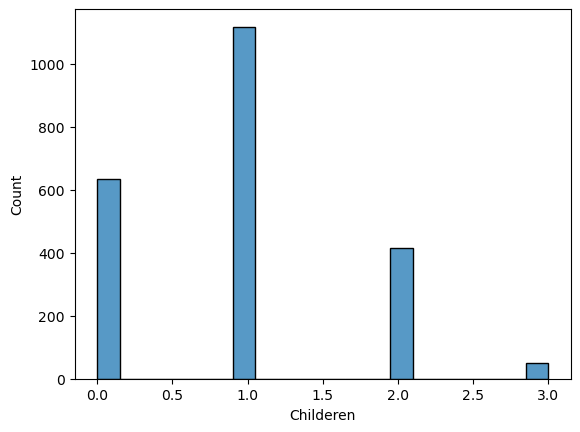

****************************************************
count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64


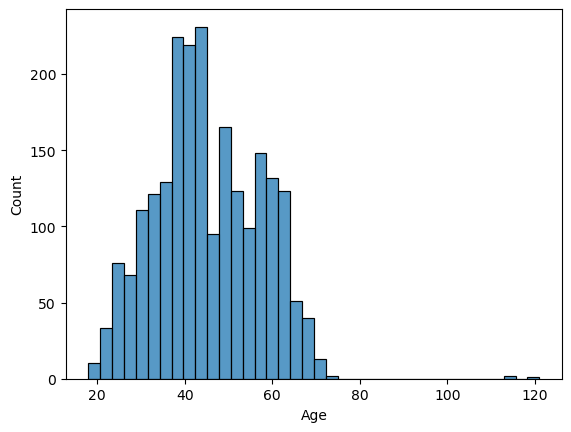

****************************************************
count    2216.000000
mean       14.880866
std         7.670957
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: NumTotalPurchases, dtype: float64


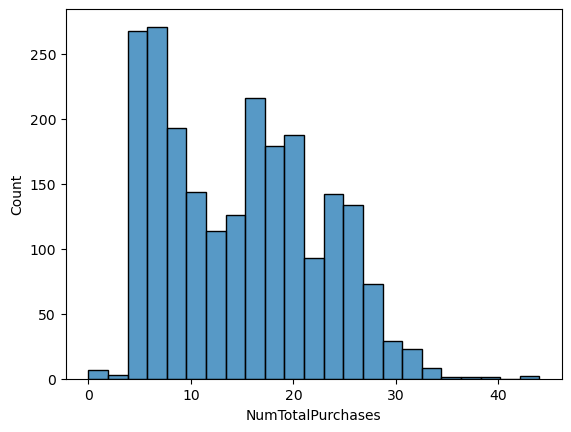

****************************************************
count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Expenses, dtype: float64


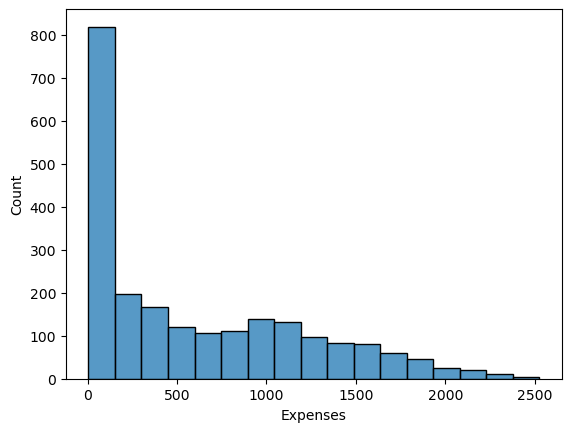

****************************************************
count    2216.000000
mean        0.448556
std         0.892440
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: TotalAcceptedCmp, dtype: float64


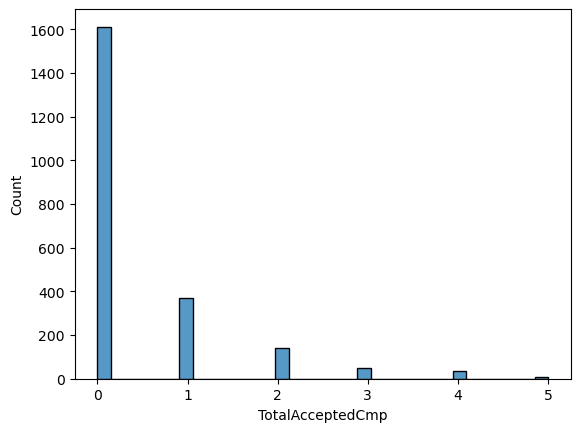

****************************************************


In [21]:
for col in num_cols:
    num_summary(df, col, plot = True)

## Encoding İşlemleri ve Aykırı Değerler

In [22]:
# label encoding
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

In [23]:
df.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Days,Childeren,Age,NumTotalPurchases,Expenses,TotalAcceptedCmp
0,0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,824,0,57,25,1617,1
1,0,0,46344.0,38,11,1,6,2,1,6,2,1,1,2,274,2,60,6,27,0
2,0,1,71613.0,26,426,49,127,111,21,42,1,8,2,10,473,0,49,21,776,0
3,0,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,300,1,30,8,53,0
4,0,1,58293.0,94,173,43,118,46,27,15,5,5,3,6,322,1,33,19,422,0


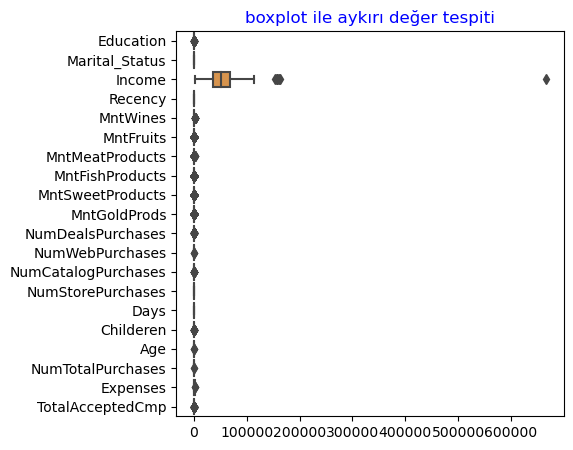

In [24]:
# aykırı gözlemler
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=df , orient="h")
plt.title('boxplot ile aykırı değer tespiti', color = 'blue')
plt.show()

income değşkeninde aykırı değerler görünmekte

In [25]:
# aykırı değerlerin silinmesi
q3 = df.quantile(0.99)
q1 = df.quantile(0.01)
iqr = q3-q1
lower_range = q1 - (1.5 * iqr)
upper_range = q3 + (1.5 * iqr)

df = df[~((df < lower_range)|(df > upper_range) ).any(axis=1)]

In [26]:
df["Income"].describe()

count      2212.000000
mean      51895.500452
std       21272.896166
min        1730.000000
25%       35303.000000
50%       51371.000000
75%       68468.250000
max      162397.000000
Name: Income, dtype: float64

In [27]:
df.shape

(2212, 20)

## Kmeans Modelinin Kurulması

In [28]:
df0 = df.copy()

In [29]:
# kmeans modeli kurulumu
kmeans = KMeans(n_clusters = 3, random_state = 42).fit(df0)
prediction_cluster = kmeans.predict(df0)

In [30]:
df0["Cluster"] = prediction_cluster + 1

Cluster
3    782
1    738
2    692
Name: count, dtype: int64


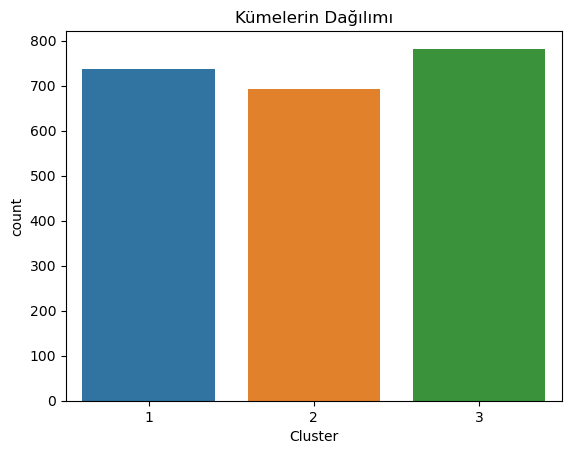

In [31]:
# kmeans için kümelerin dağılımı
sns.countplot(x=df0["Cluster"]).set_title("Kümelerin Dağılımı");
print(df0['Cluster'].value_counts())

In [32]:
# kmeans için cLuster kesişiminde ortalamalar
df0_ort = df0.groupby(["Cluster"]).mean()
df0_ort.reset_index(inplace=True)
df0_ort.drop(cat_cols, axis=1, inplace=True)
df0_ort.head()

,Cluster,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Days,Childeren,Age,NumTotalPurchases,Expenses,TotalAcceptedCmp
0,1,28350.788618,48.525745,30.356369,6.013550,23.306233,9.104336,6.079946,17.779133,2.126016,2.157182,0.491870,3.084011,514.551491,1.120596,40.895664,7.859079,92.639566,0.205962
1,2,76604.869942,49.182081,618.046243,57.147399,392.406069,82.693642,60.092486,70.513006,1.608382,5.432081,5.362717,8.424855,501.835260,0.445087,46.589595,20.828035,1280.898844,0.878613
2,3,52249.865729,49.446292,288.907928,18.401535,97.478261,24.851662,17.671355,45.387468,3.111253,4.730179,2.250639,6.067775,524.904092,1.230179,48.025575,16.159847,492.698210,0.299233


In [33]:
df0_ort.columns

Index(['Cluster', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'Days', 'Childeren', 'Age',
       'NumTotalPurchases', 'Expenses', 'TotalAcceptedCmp'],
      dtype='object')

In [34]:
# yaş, gelir, çocuk vb
df0_ort[['Cluster', 'Income', 'Age', 'Childeren', 'Days','Recency', 'TotalAcceptedCmp']]

,Cluster,Income,Age,Childeren,Days,Recency,TotalAcceptedCmp
0,1,28350.788618,40.895664,1.120596,514.551491,48.525745,0.205962
1,2,76604.869942,46.589595,0.445087,501.835260,49.182081,0.878613
2,3,52249.865729,48.025575,1.230179,524.904092,49.446292,0.299233


In [35]:
# ürünler ve toplam harcama
df0_ort[['Cluster','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'MntFruits', 'MntWines', 'Expenses']]

,Cluster,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntFruits,MntWines,Expenses
0,1,23.306233,9.104336,6.079946,17.779133,6.013550,30.356369,92.639566
1,2,392.406069,82.693642,60.092486,70.513006,57.147399,618.046243,1280.898844
2,3,97.478261,24.851662,17.671355,45.387468,18.401535,288.907928,492.698210


In [36]:
# arçlar ve toplam alışveriş miktarı
df0_ort[['Cluster','NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases','NumDealsPurchases', 'NumTotalPurchases']]

,Cluster,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumTotalPurchases
0,1,2.157182,0.491870,3.084011,2.126016,7.859079
1,2,5.432081,5.362717,8.424855,1.608382,20.828035
2,3,4.730179,2.250639,6.067775,3.111253,16.159847


In [37]:
# ürünlerin toplam harcamaya oranı
df0_e_ratios = df0_ort[['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'MntFruits', 'MntWines', 'Expenses']]

for x in df0_e_ratios.columns:
    df0_e_ratios = df0_e_ratios.apply(lambda x : x / df0_e_ratios["Expenses"])
    
df0_e_ratios["Cluster"] = ["1", "2", "3"]
df0_e_ratios

,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MntFruits,MntWines,Expenses,Cluster
0,0.251580,0.098277,0.065630,0.191917,0.064913,0.327683,1.0,1
1,0.306352,0.064559,0.046914,0.055050,0.044615,0.482510,1.0,2
2,0.197846,0.050440,0.035866,0.092120,0.037348,0.586379,1.0,3


In [38]:
# araçların toplam alışveriş miktarına oranı
df0_p_ratios = df0_ort[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases','NumDealsPurchases', 'NumTotalPurchases']]

for x in df0_p_ratios.columns:
    df0_p_ratios = df0_p_ratios.apply(lambda x : x / df0_p_ratios["NumTotalPurchases"])
    
df0_p_ratios["Cluster"] = ["1", "2", "3"]
df0_p_ratios

,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumDealsPurchases,NumTotalPurchases,Cluster
0,0.274483,0.062586,0.392414,0.270517,1.0,1
1,0.260806,0.257476,0.404496,0.077222,1.0,2
2,0.292712,0.139274,0.375485,0.192530,1.0,3


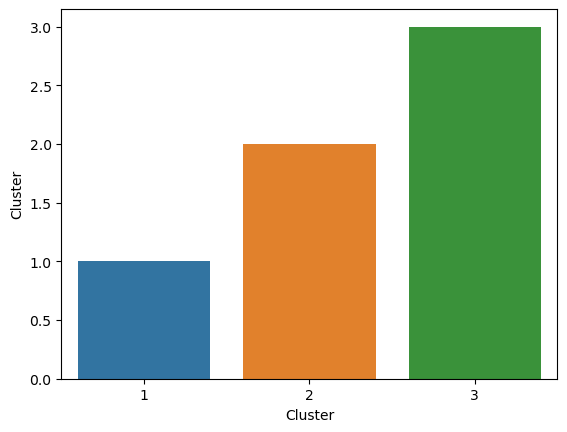

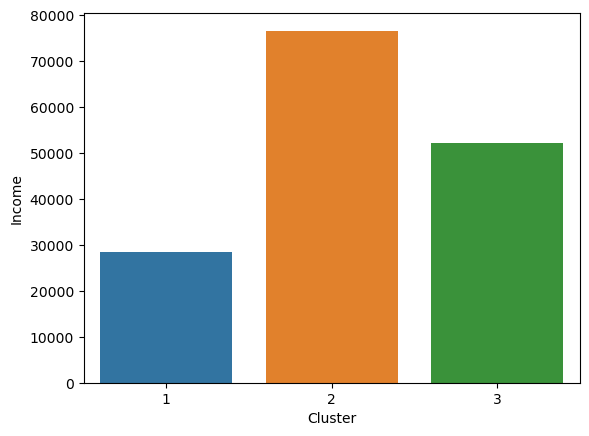

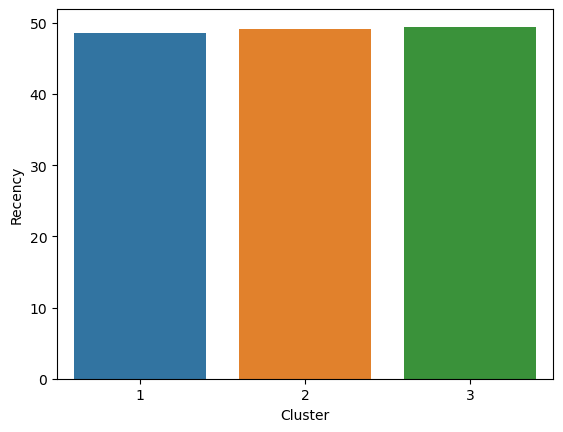

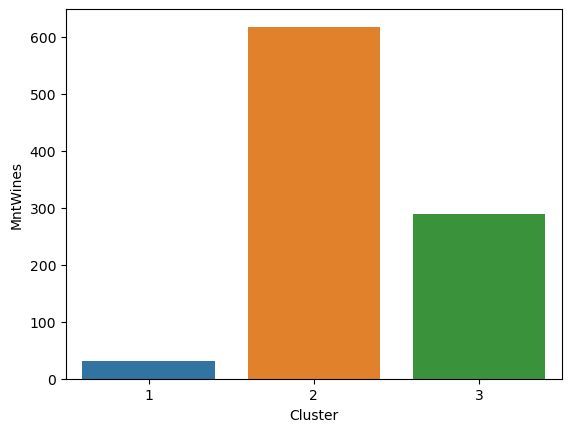

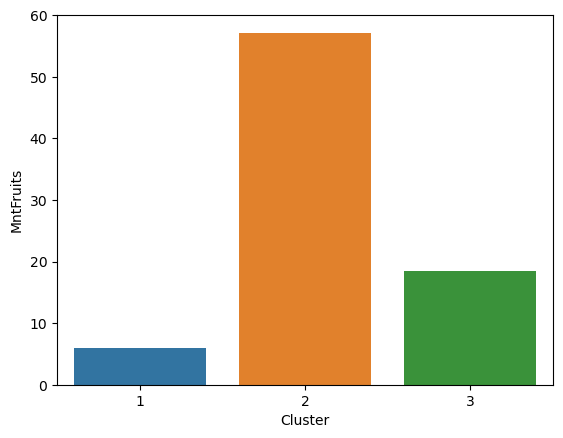

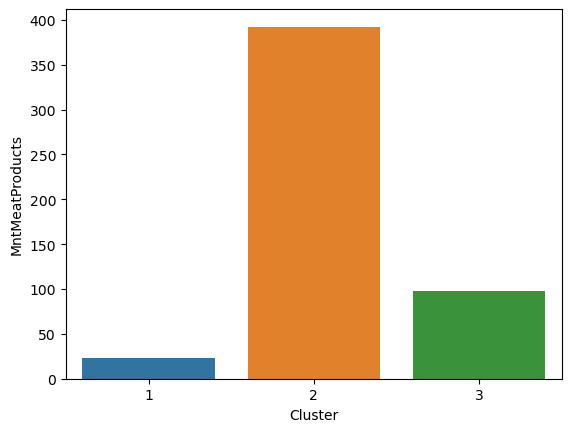

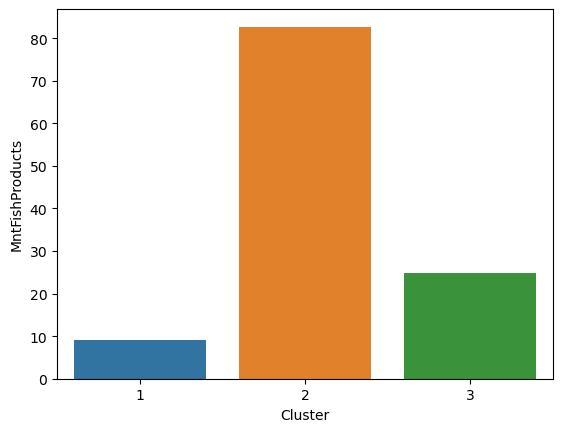

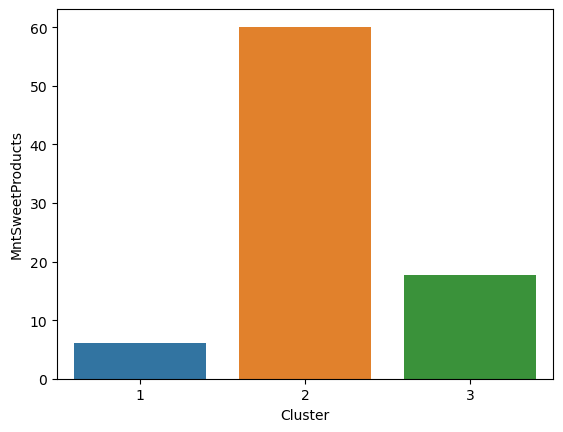

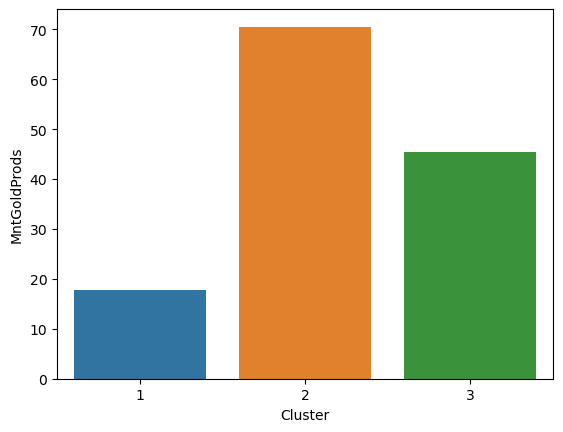

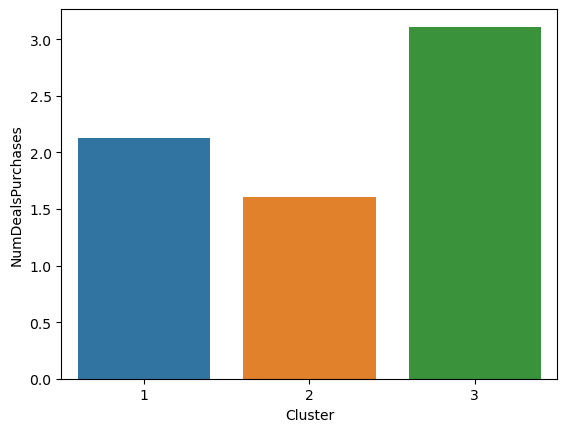

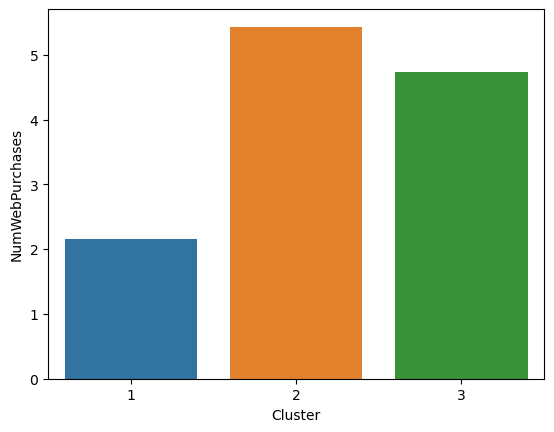

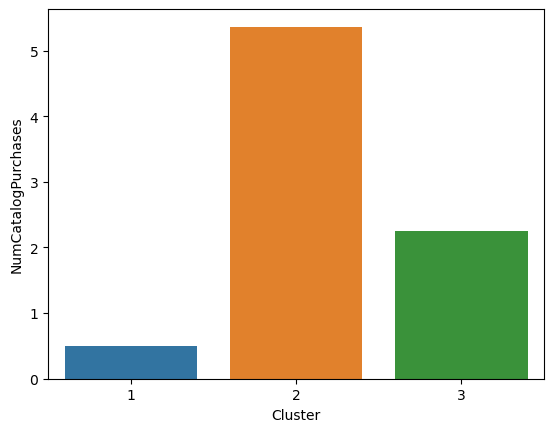

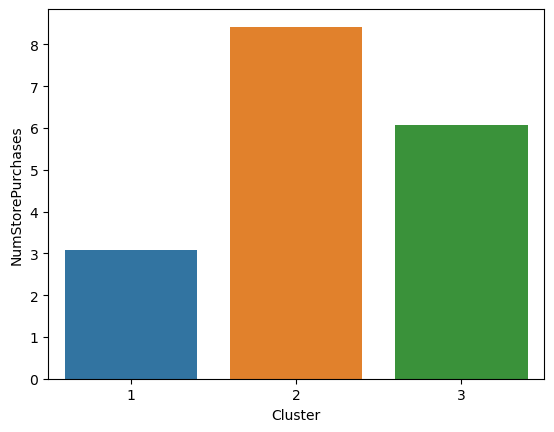

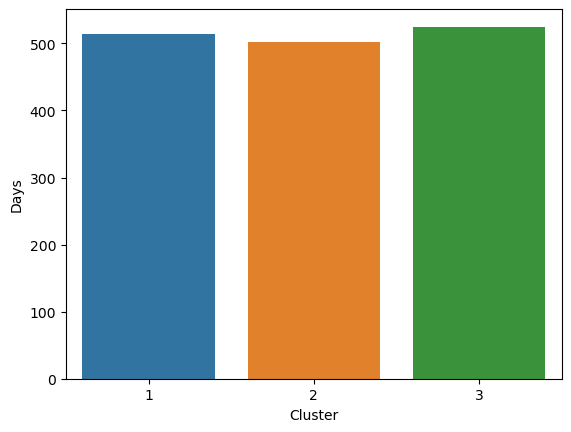

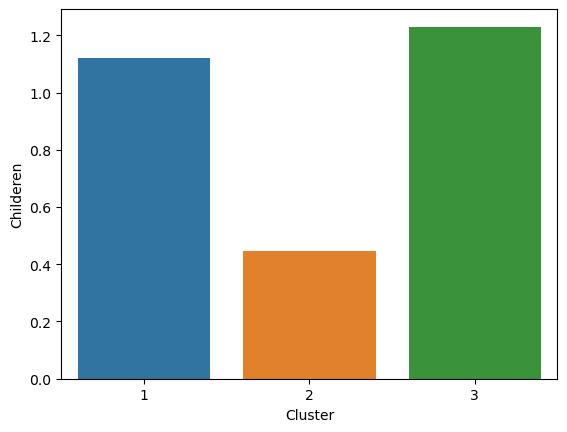

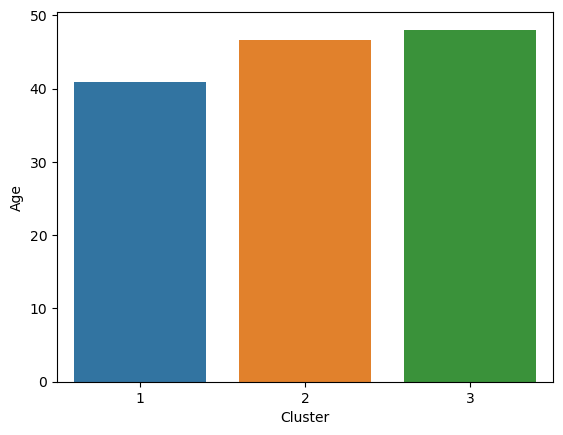

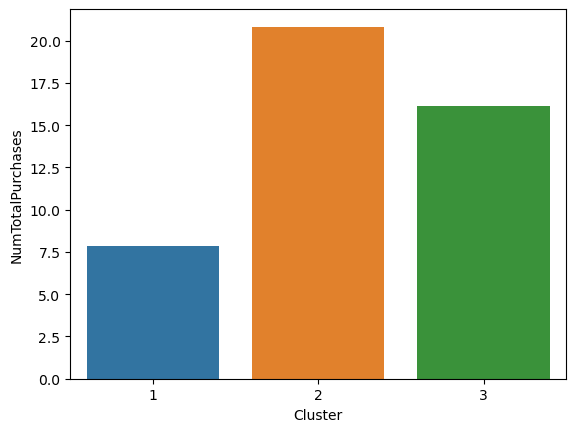

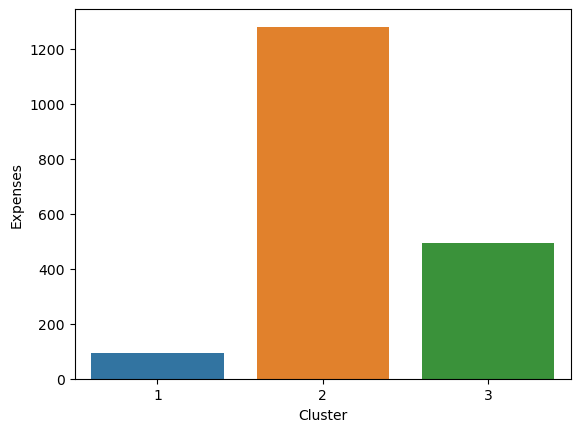

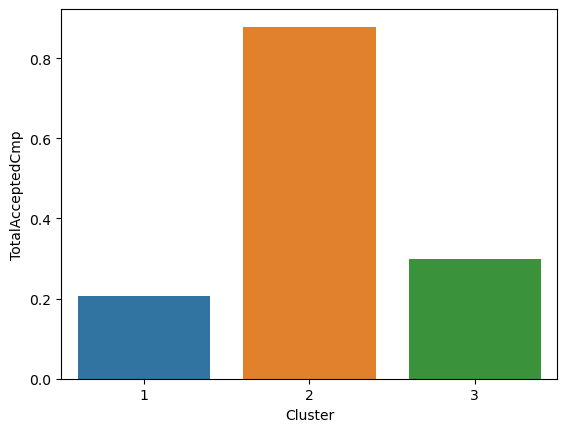

In [39]:
# ortalamaların görselleştirilmesi
for col in df0_ort.columns: 
    sns.barplot(data = df0_ort, x = "Cluster", y = col)
    plt.show(block=True)

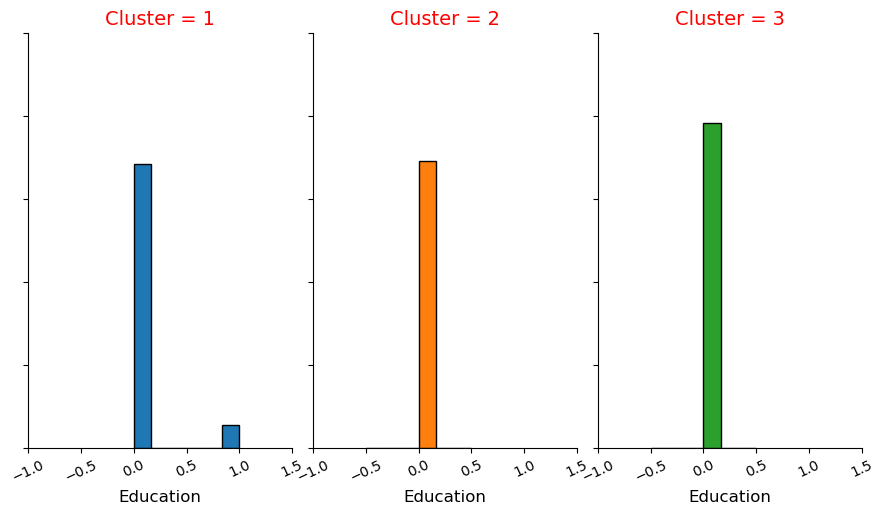

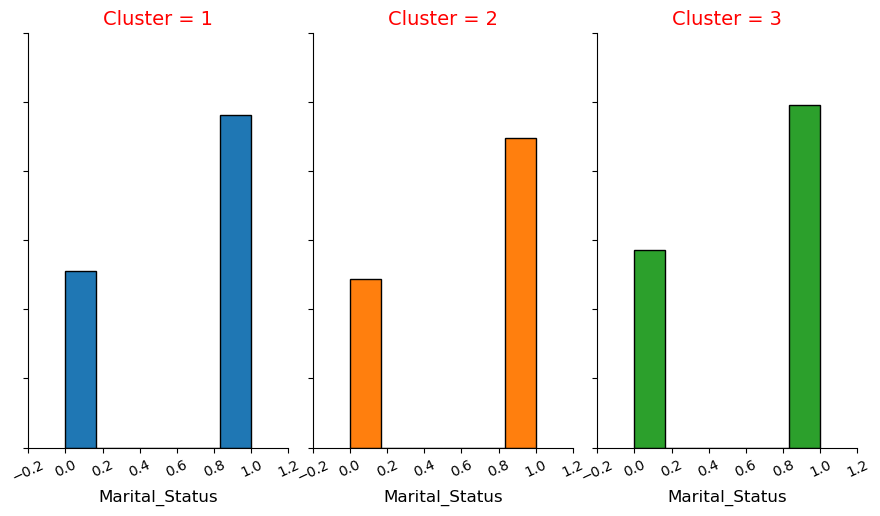

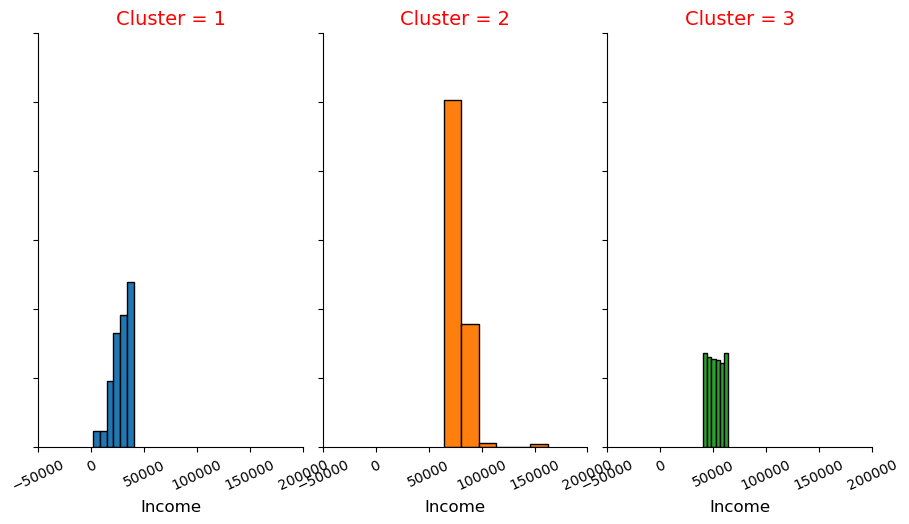

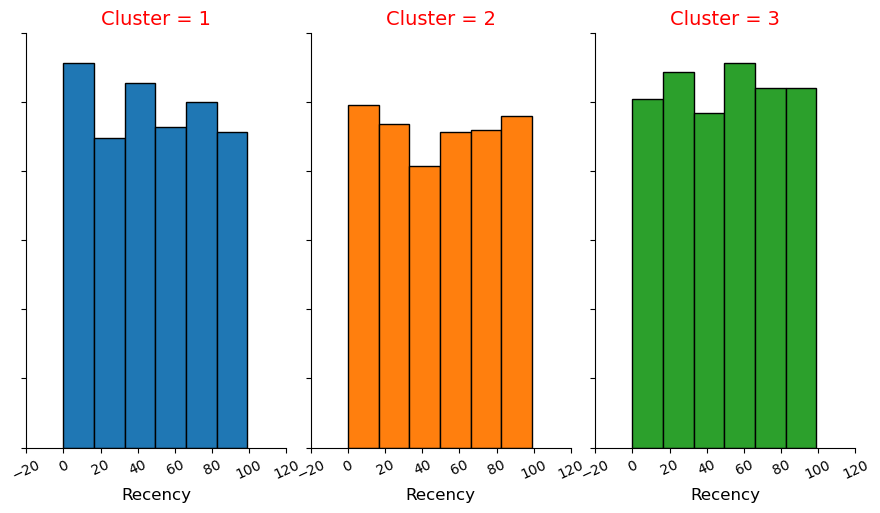

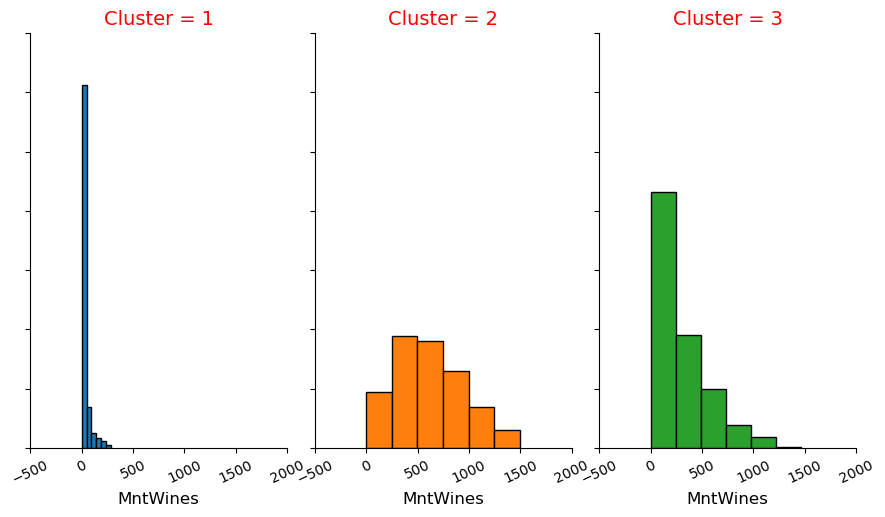

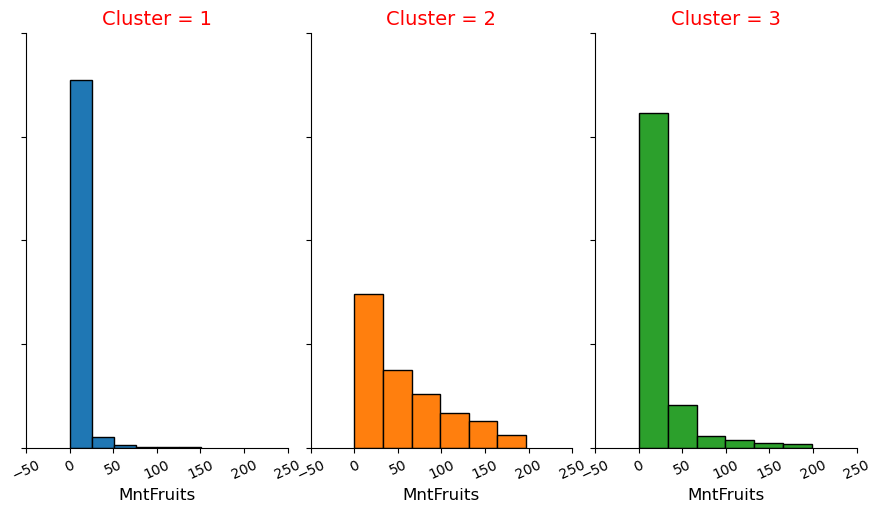

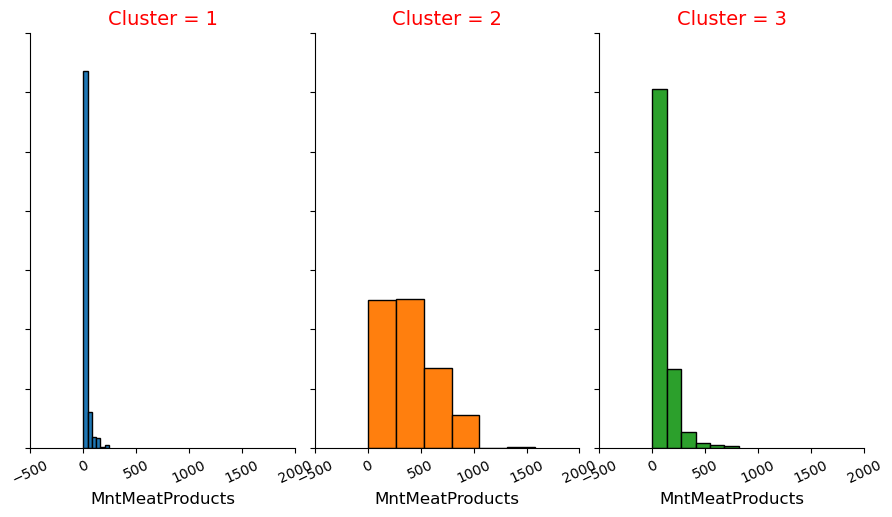

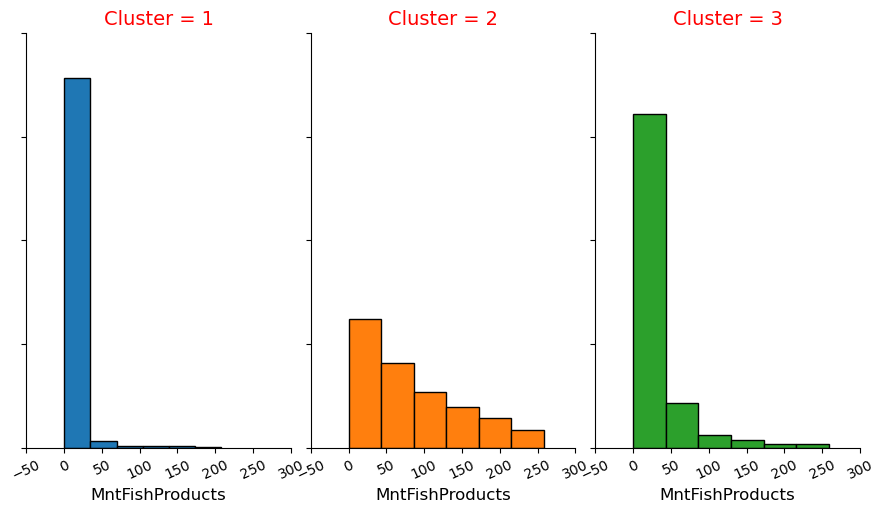

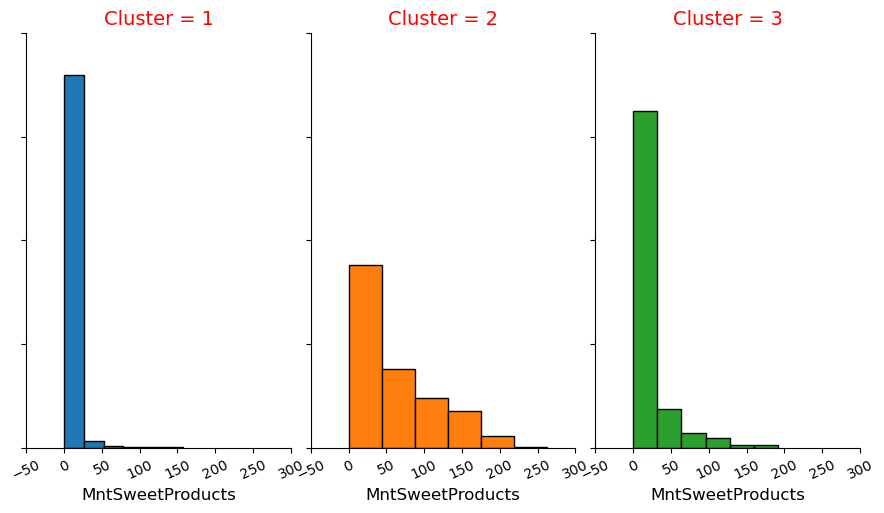

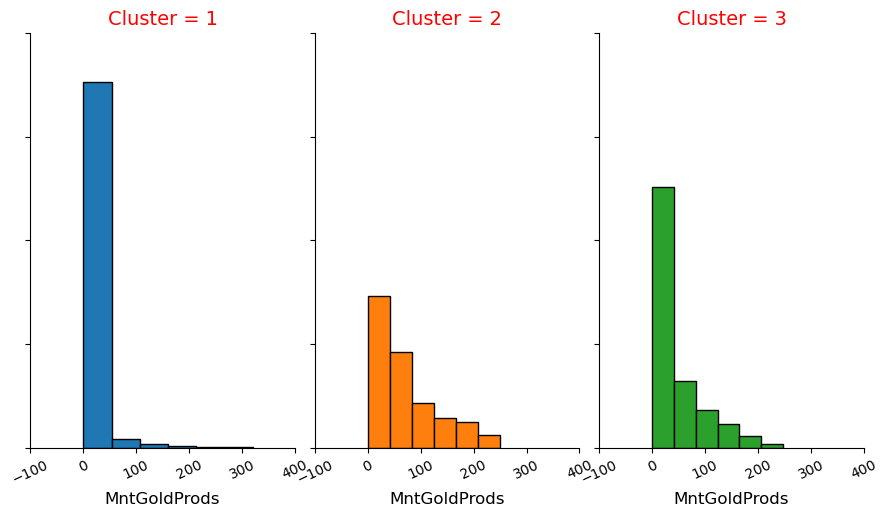

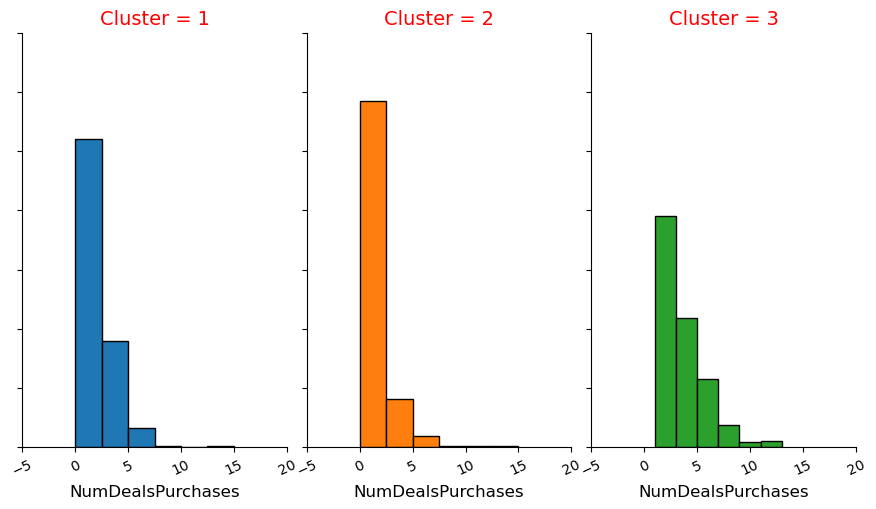

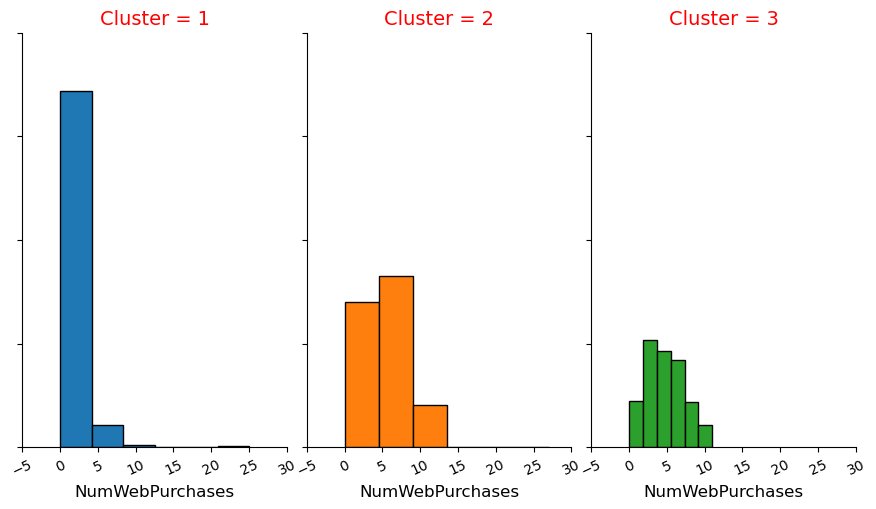

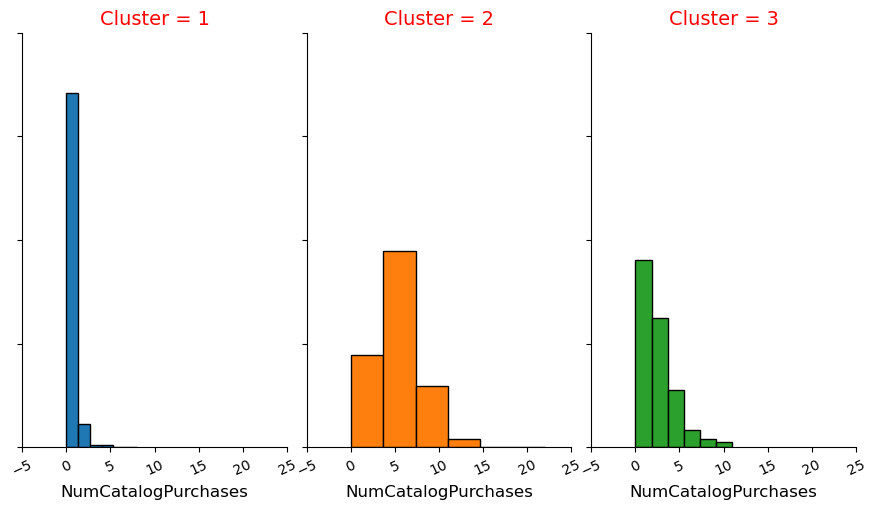

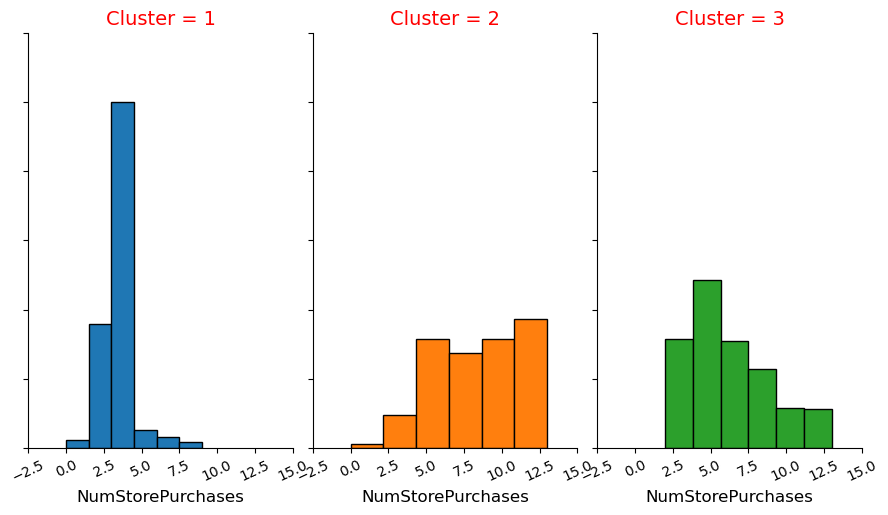

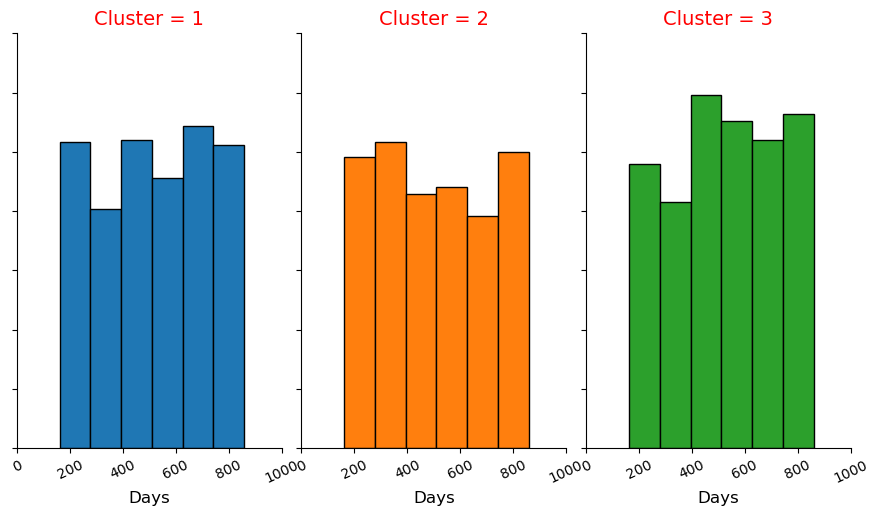

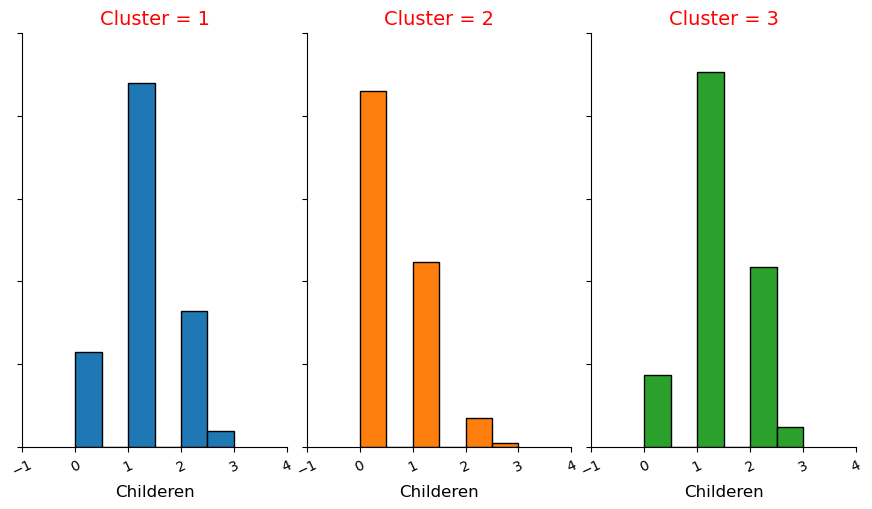

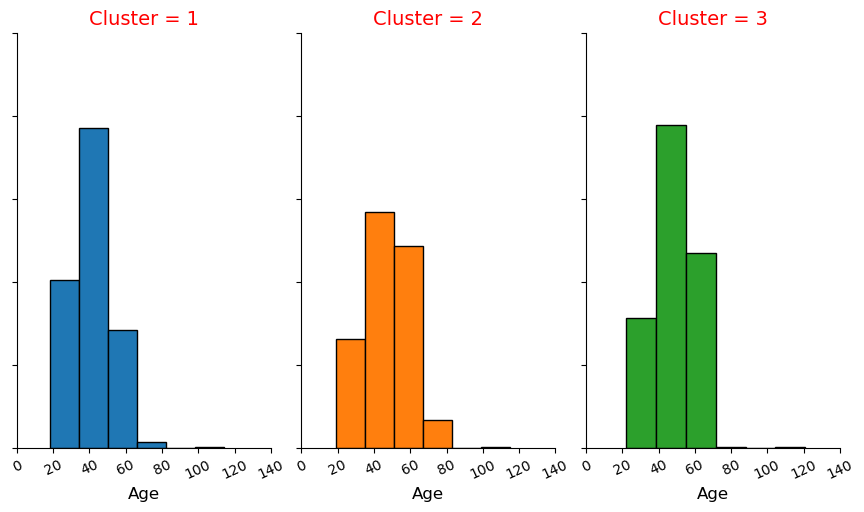

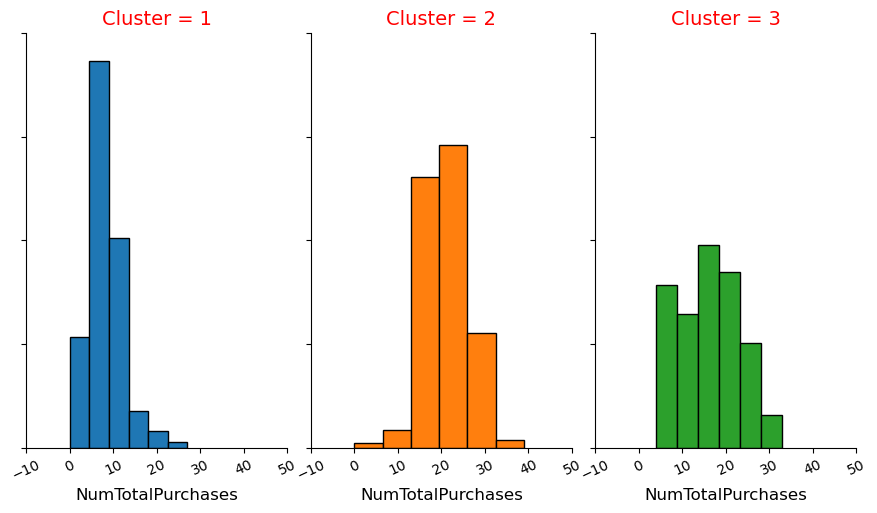

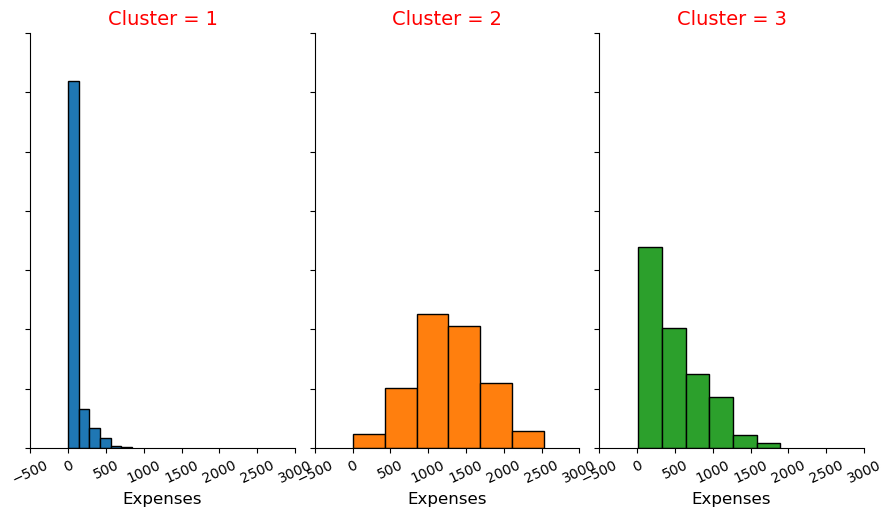

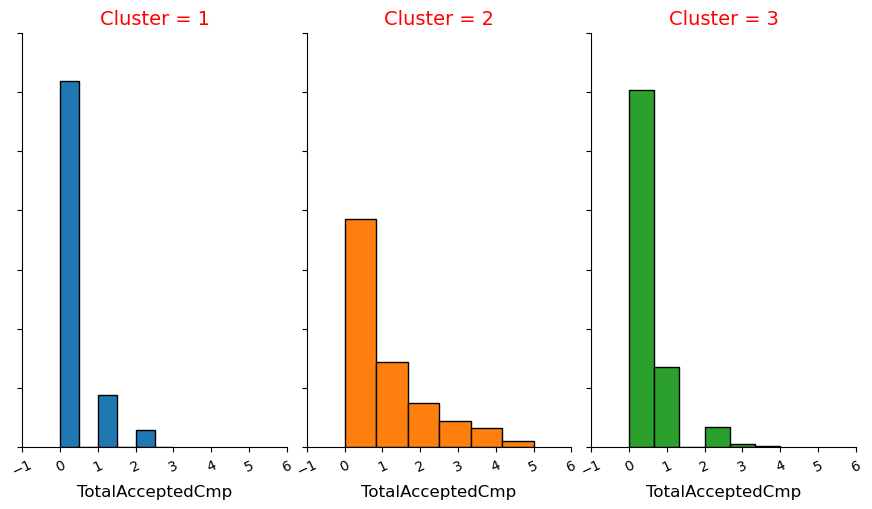

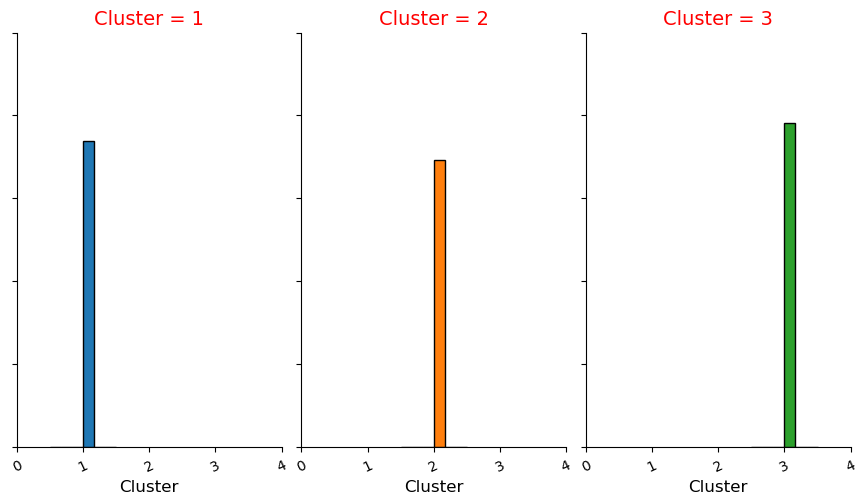

In [40]:
# tüm dağılımlar kmeans için
for i in df0:
    diag = sns.FacetGrid(df0, col = "Cluster", hue = "Cluster")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'black')
    diag.set_yticklabels(color = 'black')
    diag.set_xlabels(size=12, color = 'black')
    diag.set_titles(size=14, color = 'red')
    diag.fig.set_figheight(6)

plt.show()

## Kmedoids Modelinin Kurulması

In [41]:
# kmedoids için dataframe
df1 = df.copy()

In [42]:
# kmedoids model kurulum
kmedoids = KMedoids(n_clusters = 3, method= "pam", random_state = 42).fit(df1)
prediction_cluster1 = kmedoids.predict(df1)

In [43]:
df1["Cluster"] = prediction_cluster1 + 1

Cluster
2    771
1    734
3    707
Name: count, dtype: int64


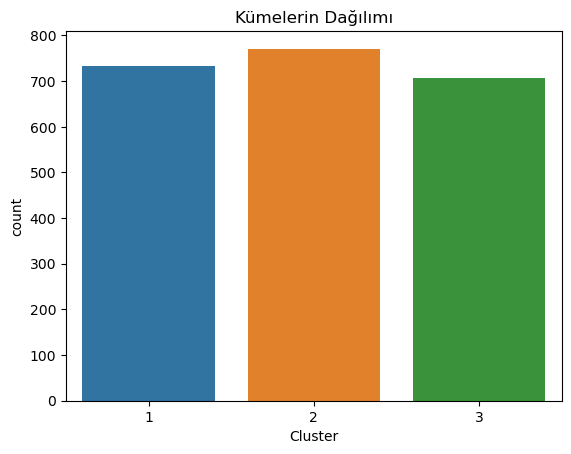

In [44]:
# kmedoids için kümelerin dağılımı
sns.countplot(x=df1["Cluster"]).set_title("Kümelerin Dağılımı");
print(df1['Cluster'].value_counts())

In [45]:
# kmedoids için cLuster kesişiminde ortalamalar
df1_ort = df1.groupby(["Cluster"]).mean()
df1_ort.reset_index(inplace=True)
df1_ort.drop(cat_cols, axis=1, inplace=True)
df1_ort.head()

,Cluster,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Days,Childeren,Age,NumTotalPurchases,Expenses,TotalAcceptedCmp
0,1,75870.091281,49.311989,619.519074,56.467302,383.200272,80.351499,58.746594,70.716621,1.683924,5.489101,5.297003,8.430518,506.885559,0.478202,46.730245,20.900545,1269.001362,0.861035
1,2,28880.530480,48.630350,33.273671,6.099870,23.826200,9.309987,6.201038,18.233463,2.147860,2.201038,0.514916,3.110246,516.656291,1.134890,41.130999,7.974060,96.944228,0.206226
2,3,52103.693069,49.256011,276.712871,17.289958,92.410184,24.357850,16.957567,44.476662,3.144272,4.701556,2.190948,6.032532,519.219236,1.231966,48.041018,16.069307,472.205092,0.287129


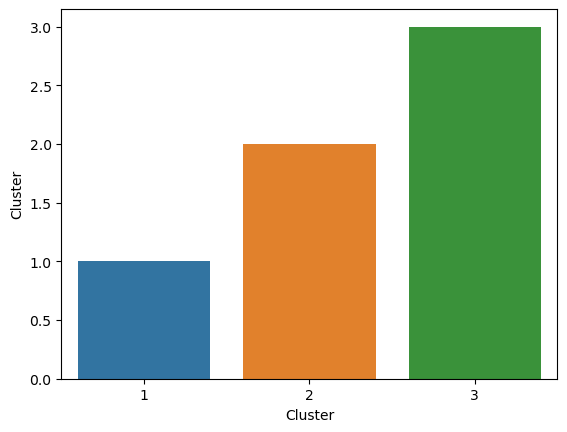

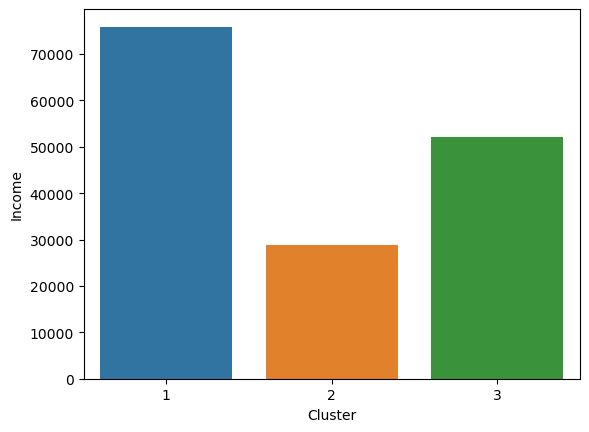

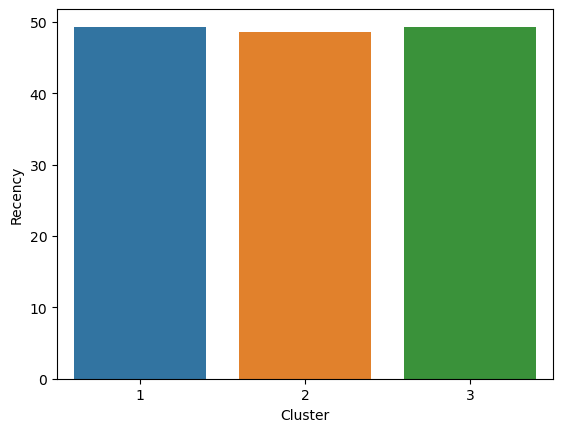

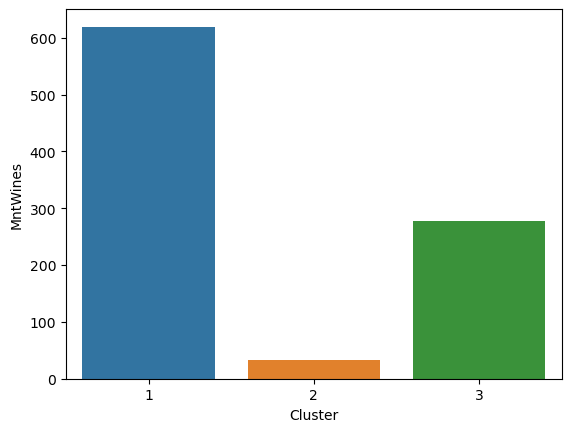

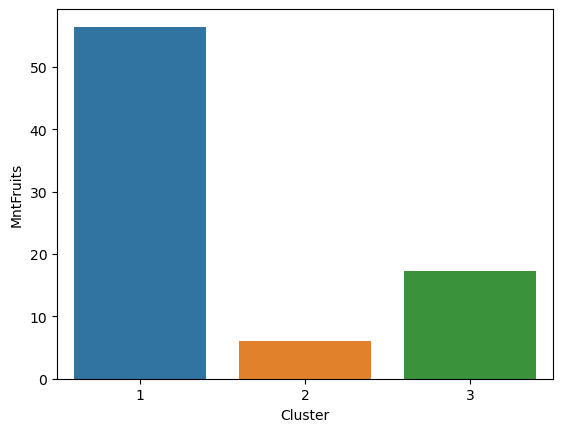

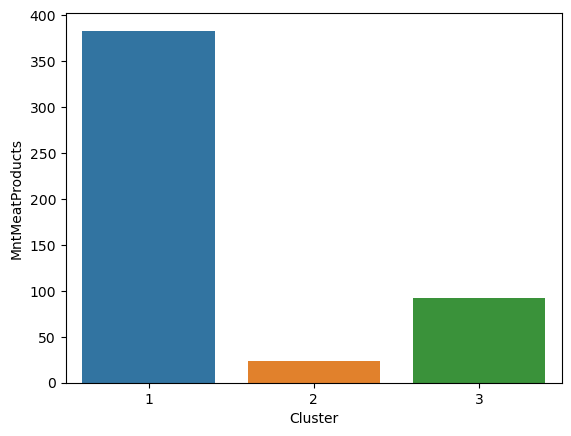

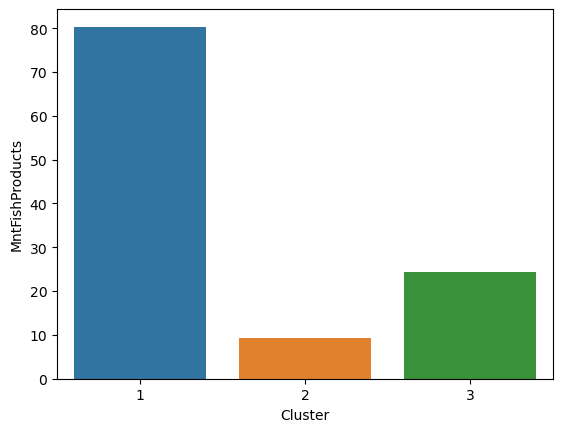

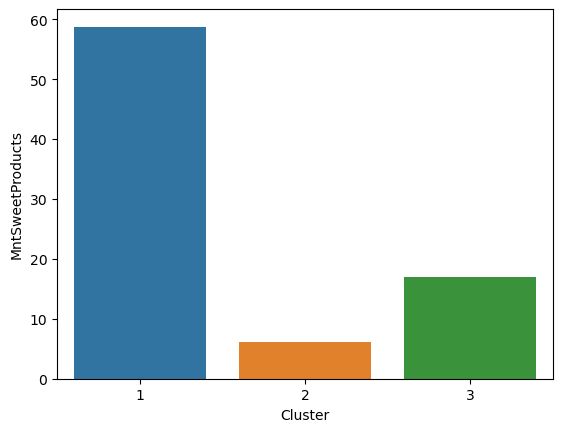

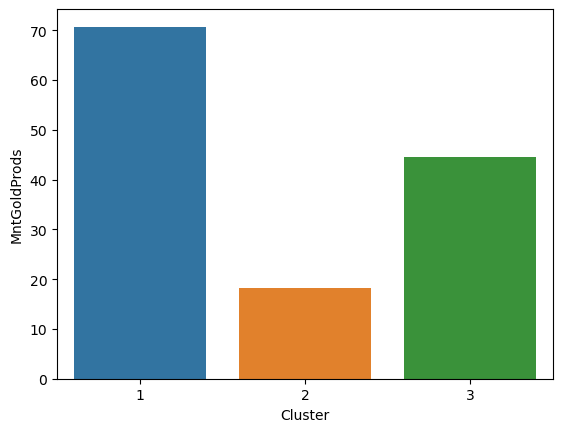

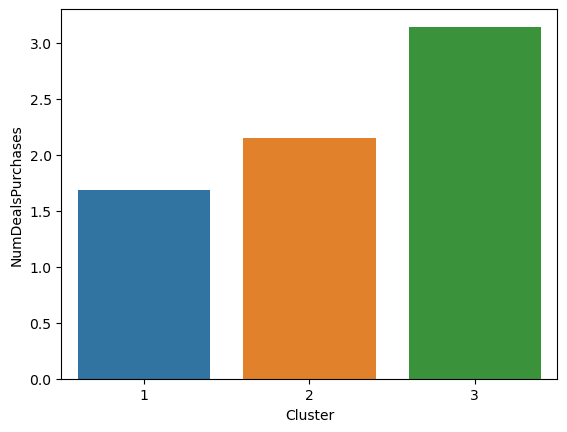

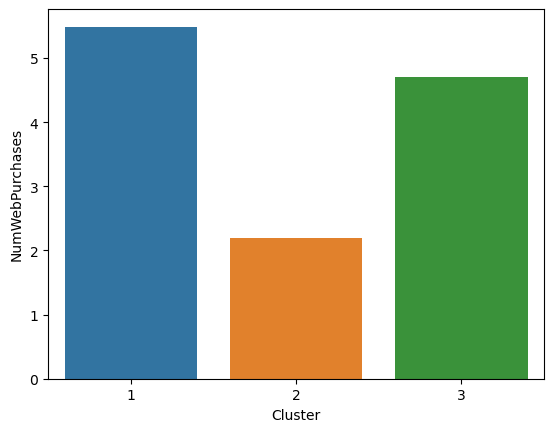

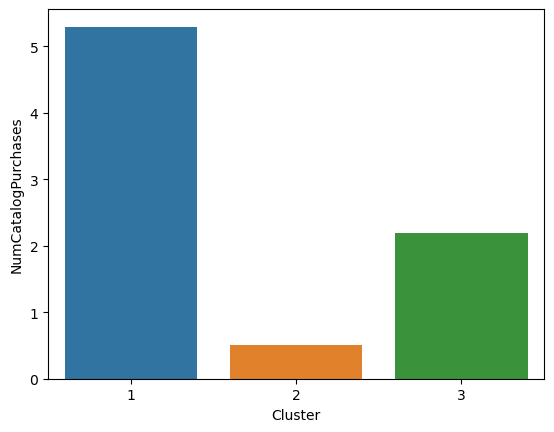

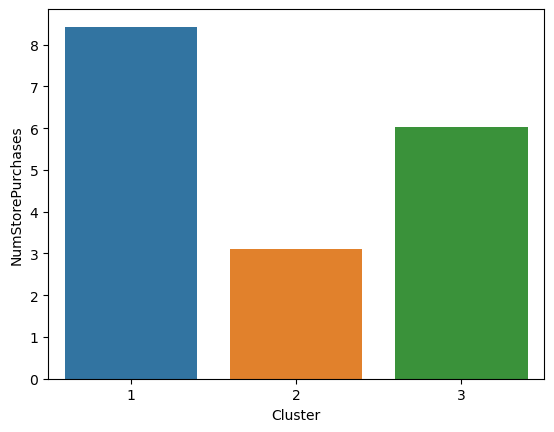

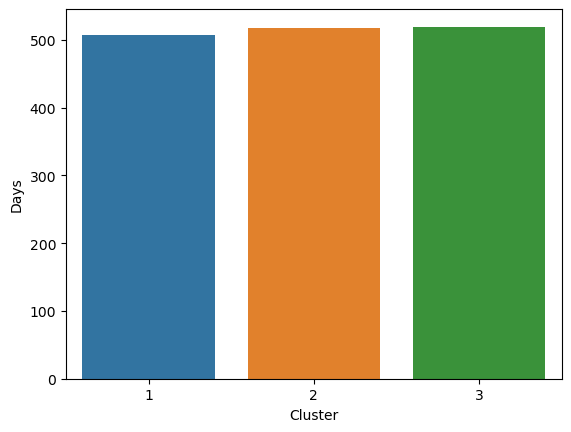

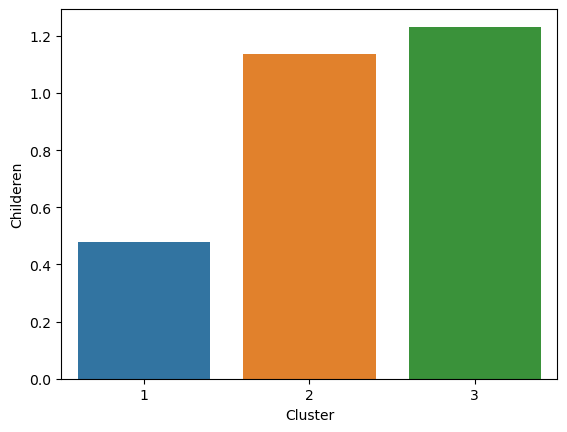

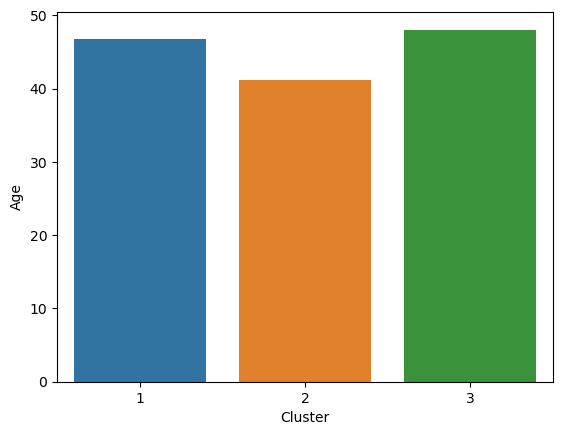

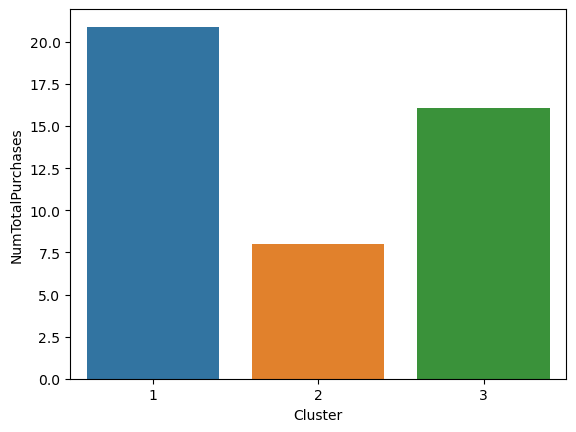

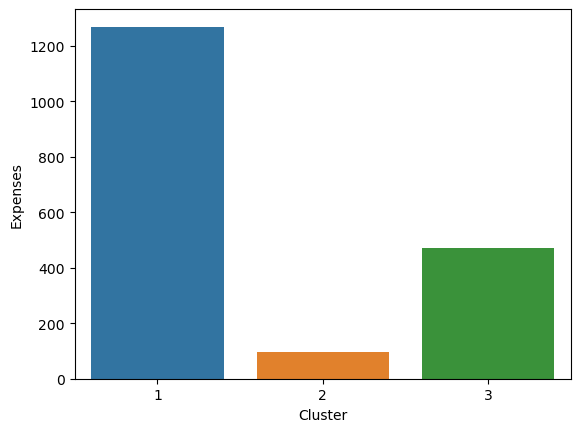

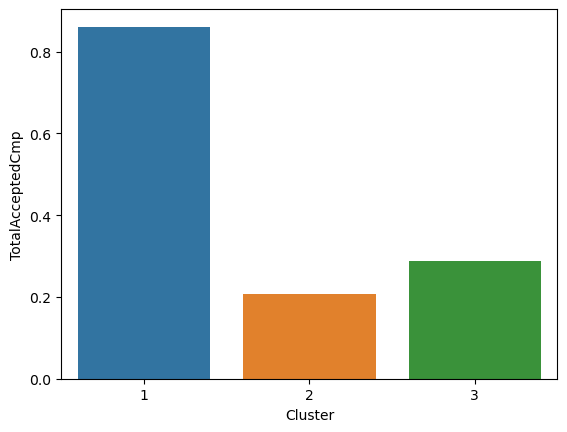

In [46]:
# görselleştirelim
for col in df1_ort.columns: 
    sns.barplot(data = df1_ort, x = "Cluster", y = col)
    plt.show(block=True)

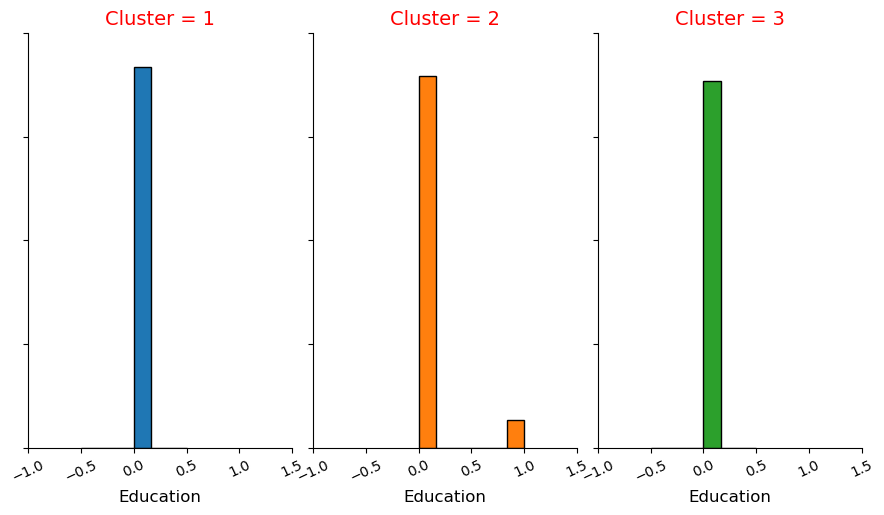

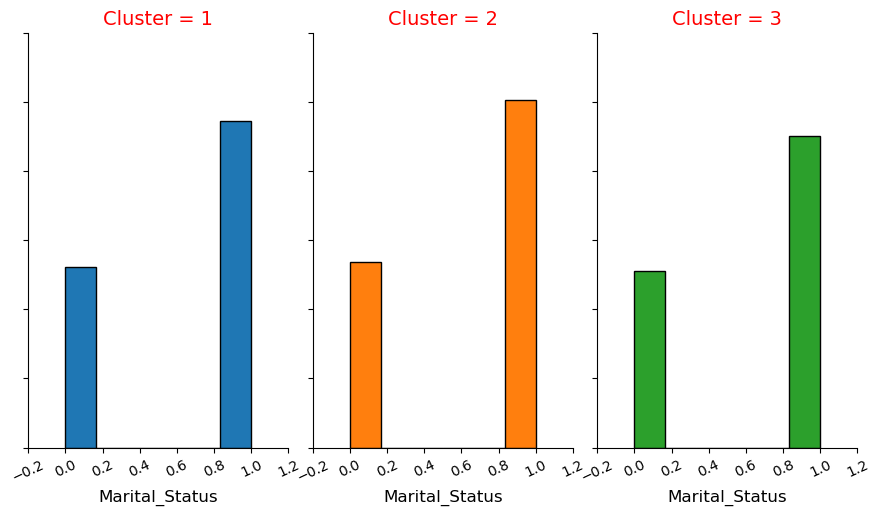

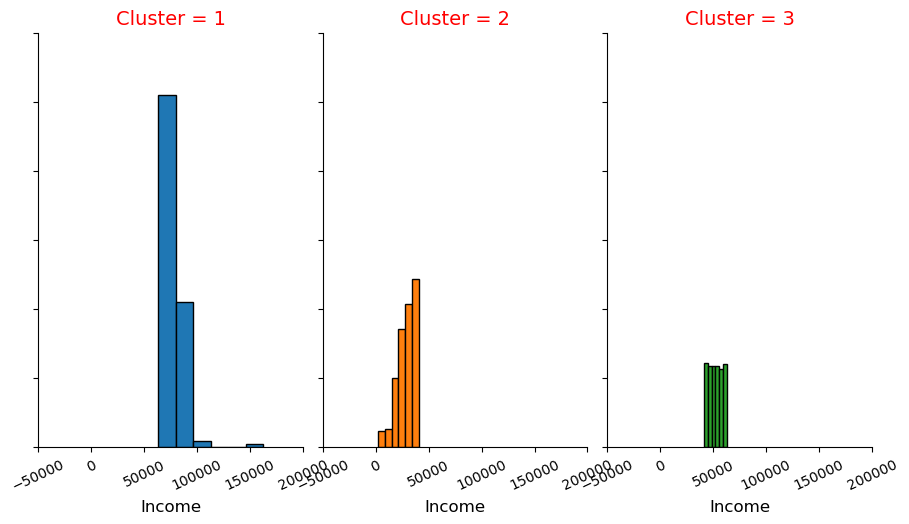

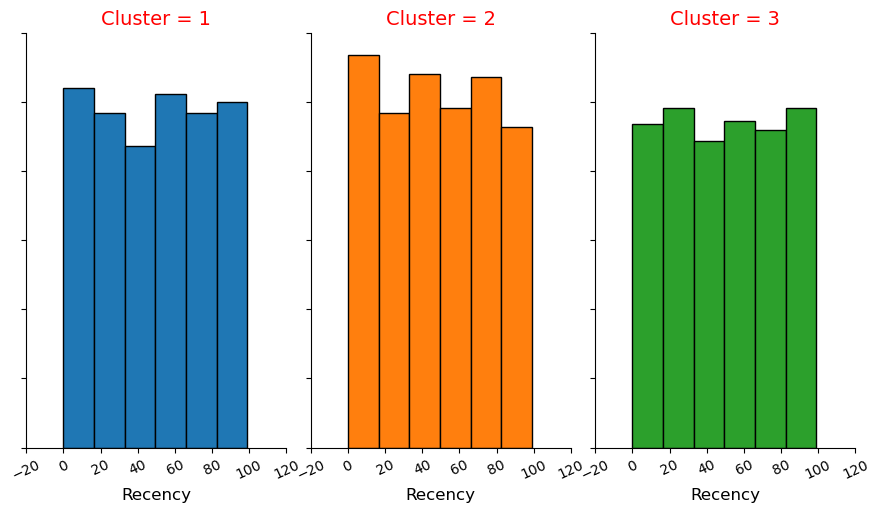

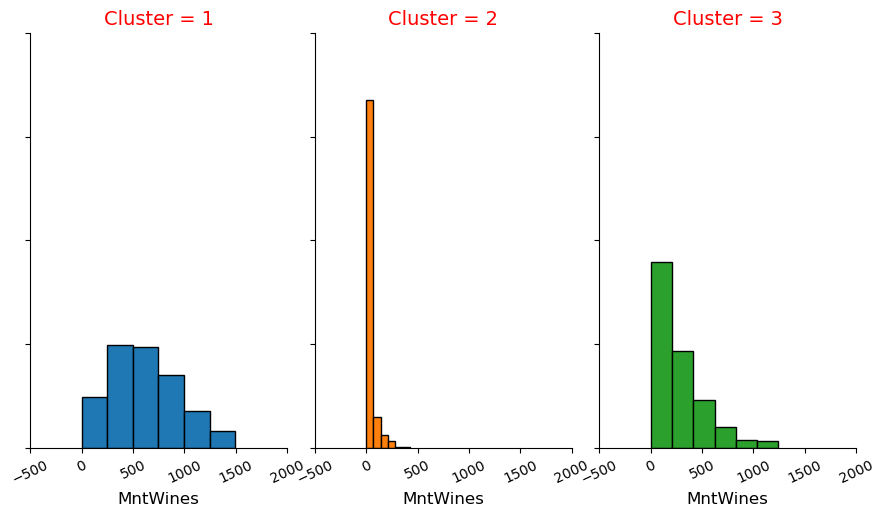

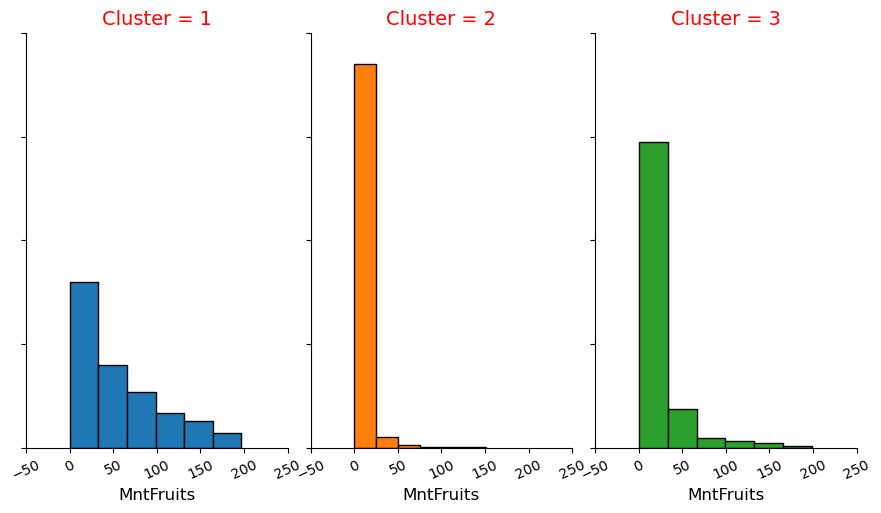

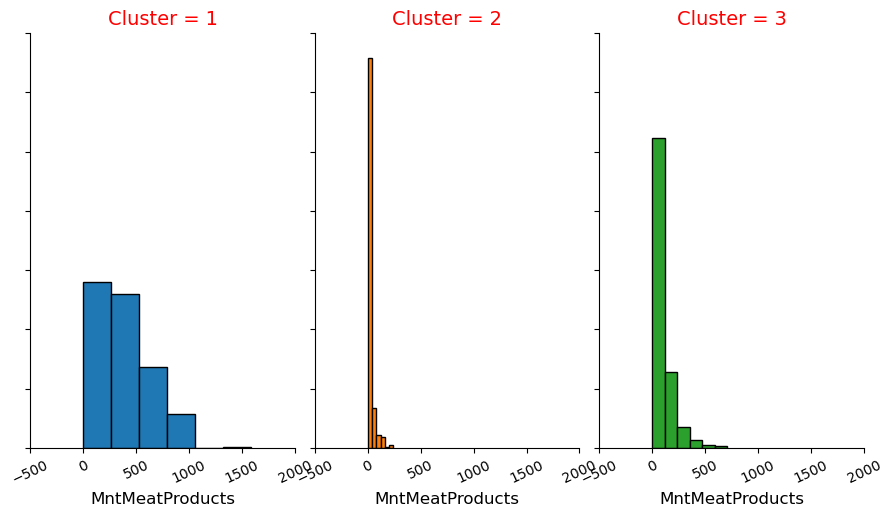

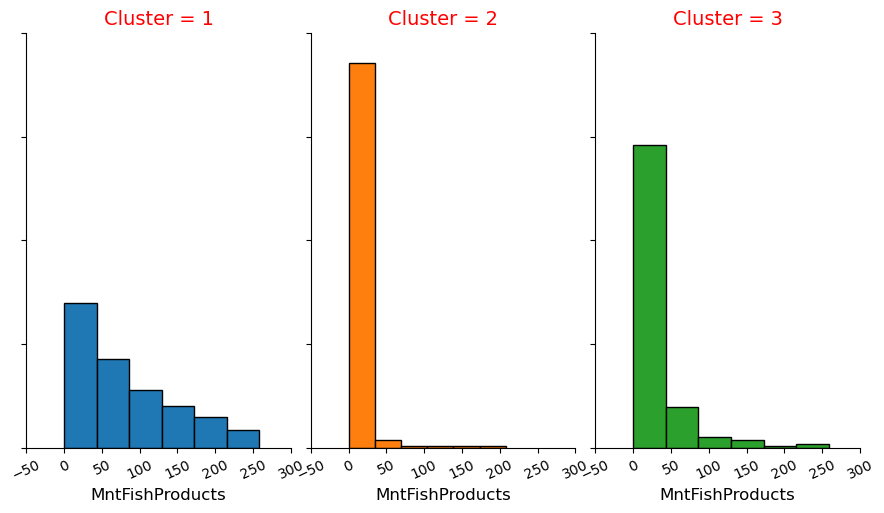

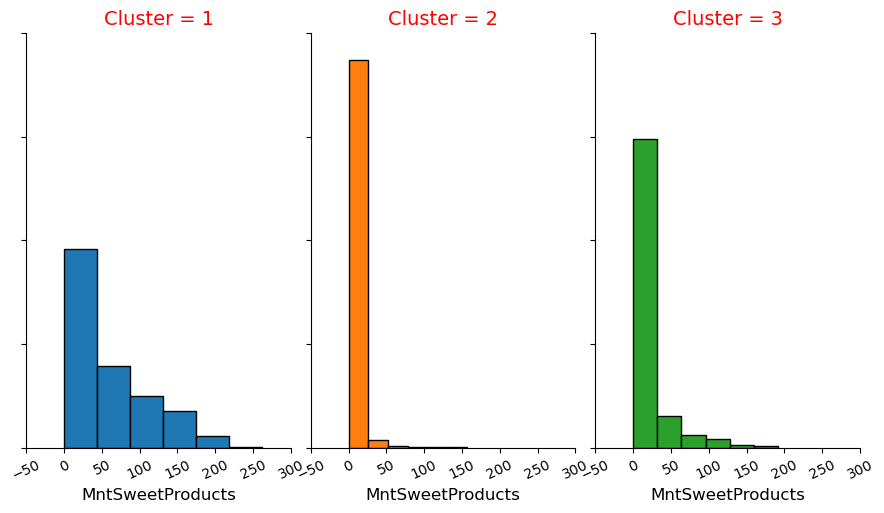

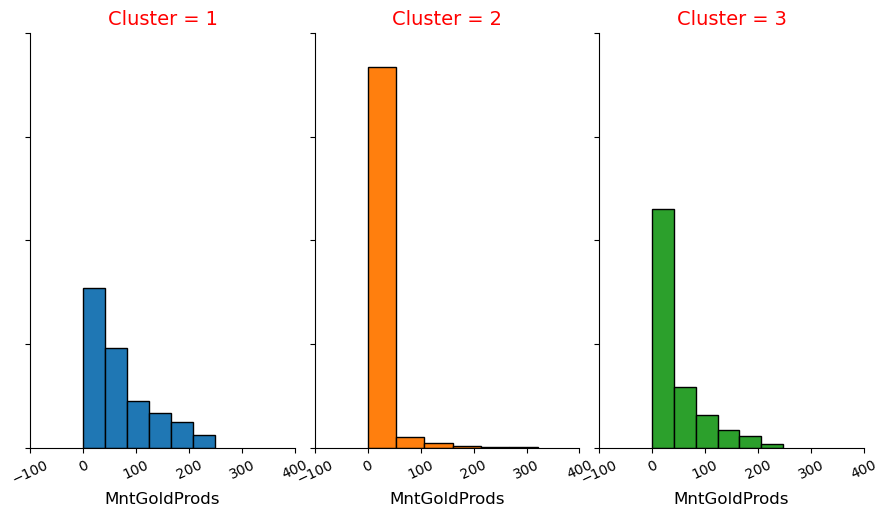

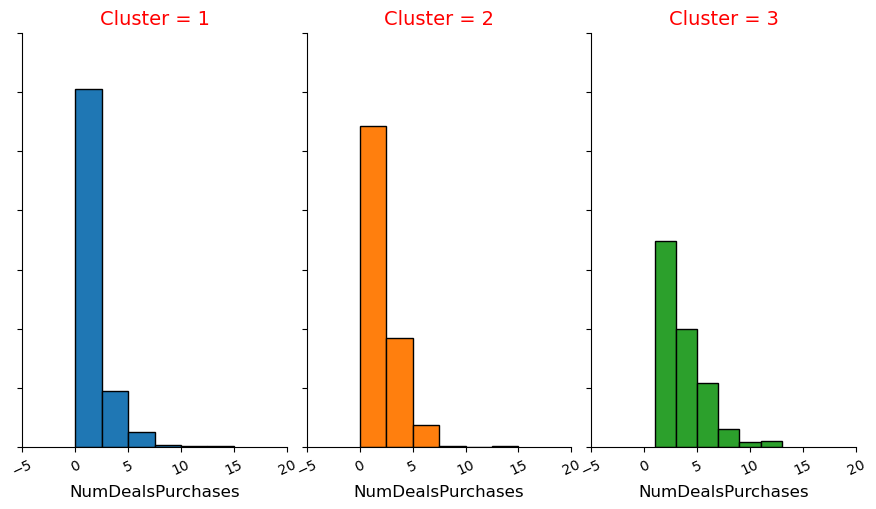

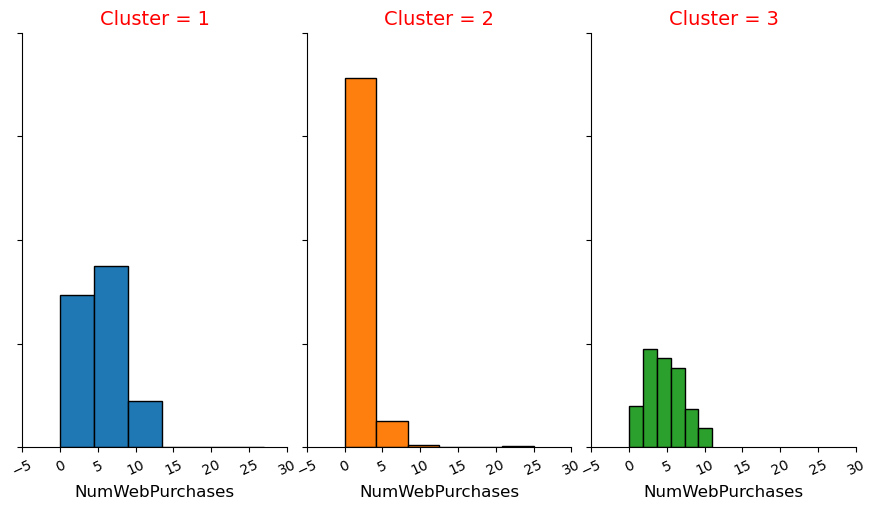

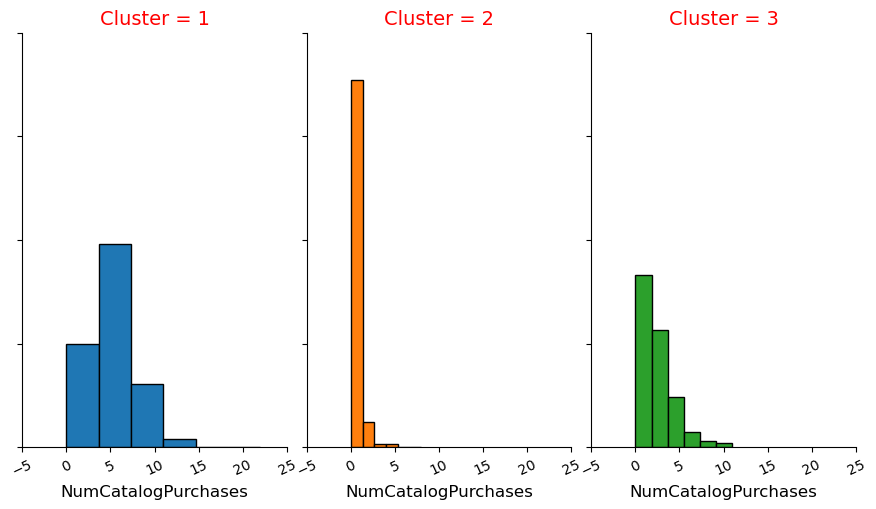

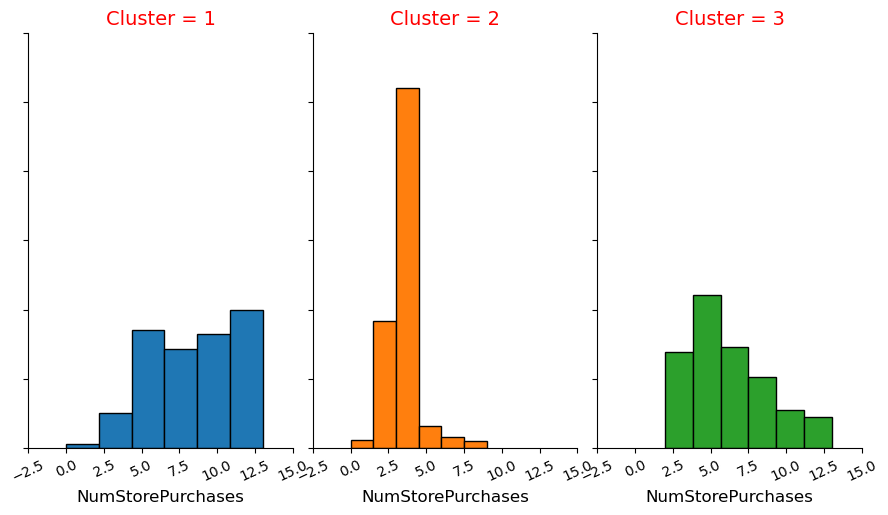

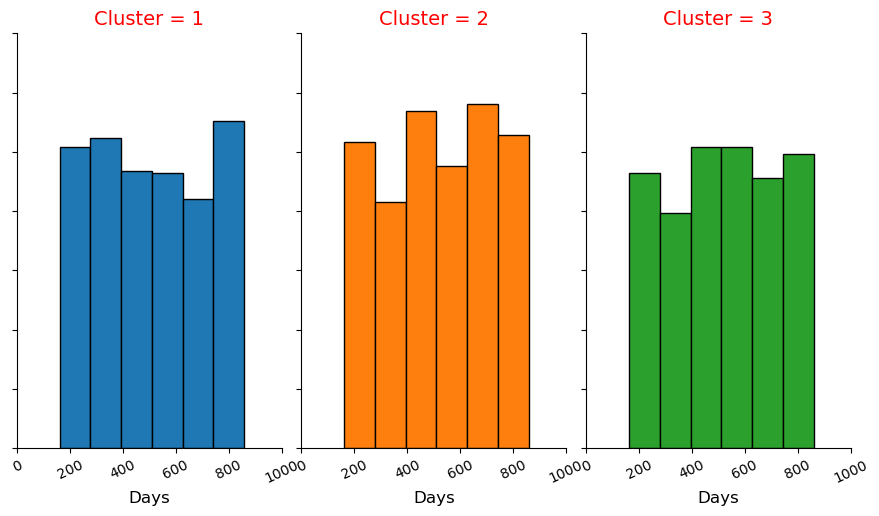

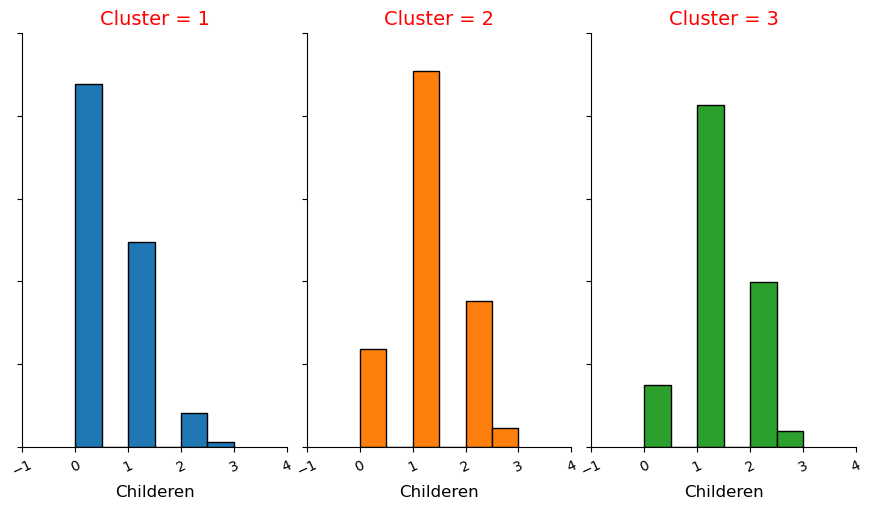

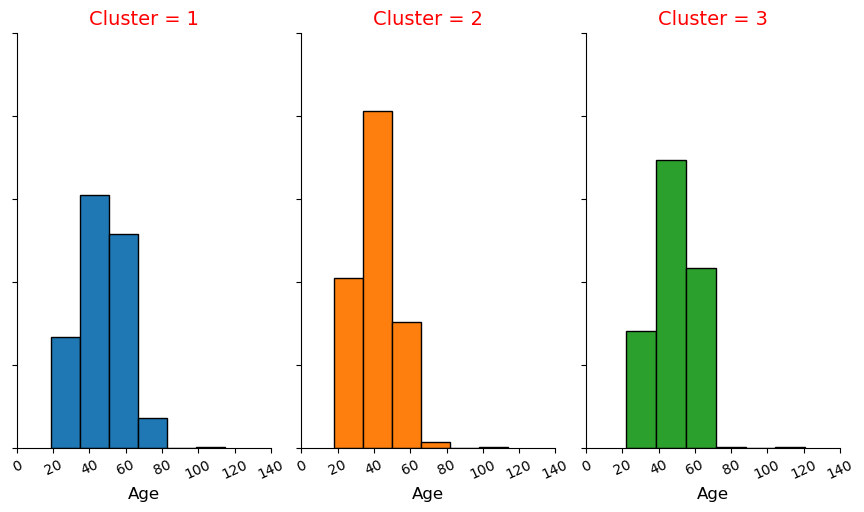

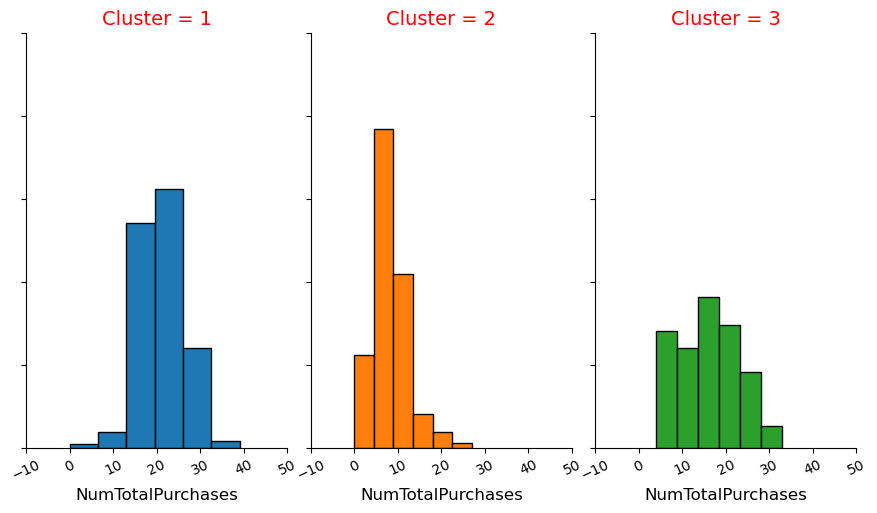

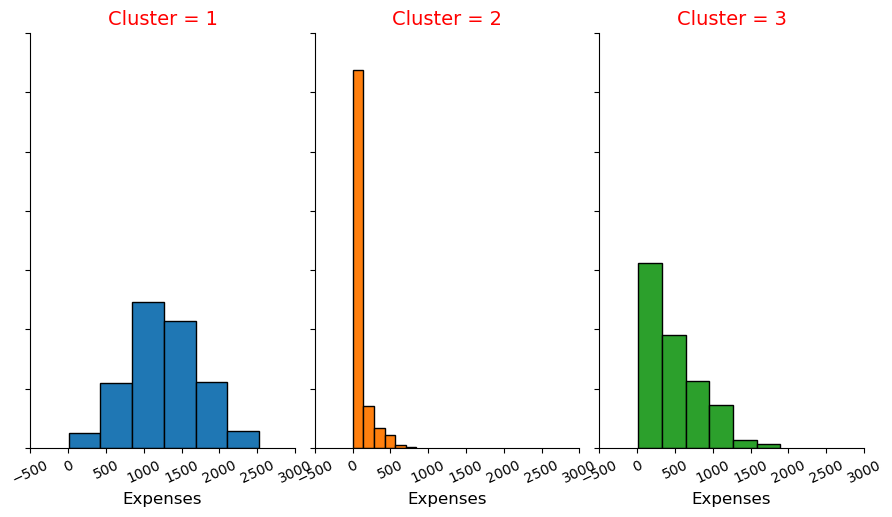

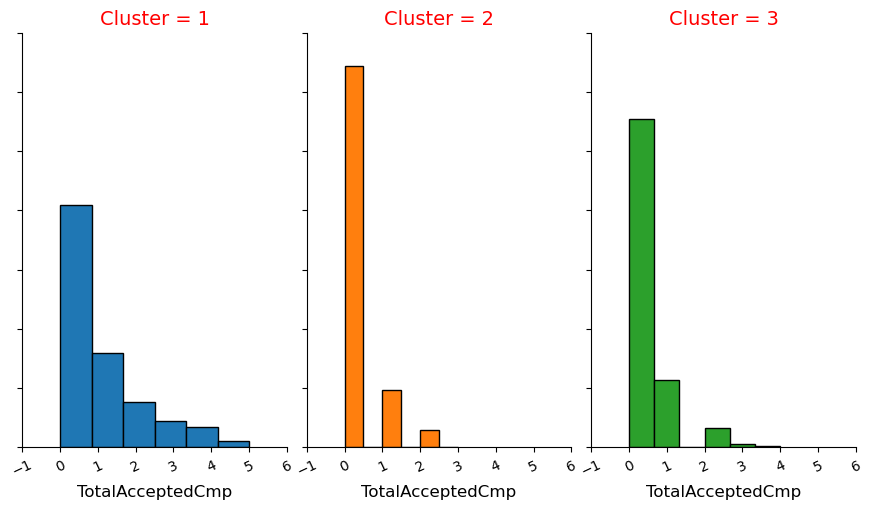

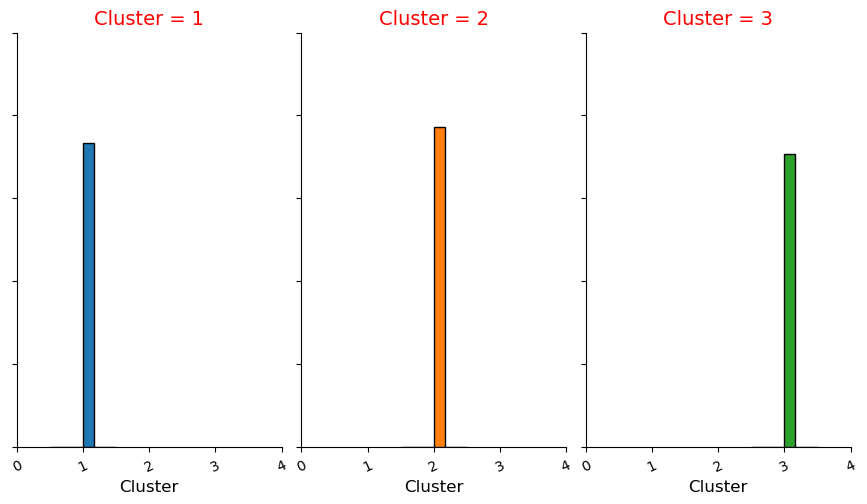

In [47]:
# kmedoids için tüm dağılımlar
for i in df1:
    diag = sns.FacetGrid(df1, col = "Cluster", hue = "Cluster")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'black')
    diag.set_yticklabels(color = 'black')
    diag.set_xlabels(size=12, color = 'black')
    diag.set_titles(size=14, color = 'red')
    diag.fig.set_figheight(6)

plt.show()

-------------

**algoritmalar arasındaki ortalama nümerik fark**

In [48]:
fark_en_aktif = df0_ort[df0_ort["Cluster"] == 2].values - df1_ort[df1_ort["Cluster"] == 1].values
pd.DataFrame(fark_en_aktif, columns = df0_ort.columns).drop("Cluster", axis=1).T

,0
Income,734.778662
Recency,-0.129908
MntWines,-1.472831
MntFruits,0.680096
MntMeatProducts,9.205797
MntFishProducts,2.342143
MntSweetProducts,1.345892
MntGoldProds,-0.203615
NumDealsPurchases,-0.075542
NumWebPurchases,-0.057020


In [49]:
fark_orta_aktif = df0_ort[df0_ort["Cluster"] == 3].values - df1_ort[df1_ort["Cluster"] == 3].values
pd.DataFrame(fark_orta_aktif, columns = df0_ort.columns).drop("Cluster", axis=1).T

,0
Income,146.172660
Recency,0.190280
MntWines,12.195057
MntFruits,1.111577
MntMeatProducts,5.068077
MntFishProducts,0.493812
MntSweetProducts,0.713788
MntGoldProds,0.910806
NumDealsPurchases,-0.033018
NumWebPurchases,0.028623


In [50]:
fark_az_aktif = df0_ort[df0_ort["Cluster"] == 1].values - df1_ort[df1_ort["Cluster"] == 2].values
pd.DataFrame(fark_az_aktif, columns = df0_ort.columns).drop("Cluster", axis=1).T

,0
Income,-529.741862
Recency,-0.104605
MntWines,-2.917302
MntFruits,-0.086320
MntMeatProducts,-0.519967
MntFishProducts,-0.205651
MntSweetProducts,-0.121092
MntGoldProds,-0.454330
NumDealsPurchases,-0.021844
NumWebPurchases,-0.043856
